# Laboratorio 1
## Precios
### Javier Ovalle, Jos√© √Ångel Morales, Ricardo Morales; 22103, 22689, 22289
### Data Science
Link del repositorio: https://github.com/Saiyan-Javi/Lab1DS

Librer√≠as a utilizar importadas de una vez al inicio del archivo:

In [ ]:
%%sql


In [18]:
!pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]



In [1]:
import numpy
numpy.version.version

'2.3.1'

In [8]:
from bs4 import BeautifulSoup
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale # Importar la librer√≠a locale para manejar el idioma
from scipy.stats import shapiro, normaltest # Para pruebas de normalidad
from statsmodels.tsa.stattools import adfuller

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

## 1. An√°lisis exploratorio de las importaciones de las gasolinas regular, super, diesel y gas de petroleo

Intentando cargar archivo Excel desde: C:/Users/ricar/Downloads/Precios.xlsx
Usando hoja: Hoja1
Columnas seleccionadas: ['Superior', 'Regular', 'Diesel', 'Bunker']
Columna de fecha: FECHA

Archivo de Excel cargado exitosamente.

Iniciando An√°lisis Exploratorio de Datos (EDA)

Columna 'FECHA' convertida a tipo: datetime64[ns]

Columnas seleccionadas para el an√°lisis: ['Superior', 'Regular', 'Diesel', 'Bunker'] y FECHA

--- 1. Informaci√≥n General y Estad√≠sticas Descriptivas ---

Informaci√≥n del DataFrame (primeras filas):

   Superior  Regular  Diesel  Bunker      FECHA
0     21.91    21.11   17.61   13.40 2021-01-01
1     21.91    21.11   17.61   13.40 2021-01-02
2     21.91    21.11   17.61   13.40 2021-01-03
3     21.91    21.11   17.61   13.45 2021-01-04
4     21.91    21.11   17.61   13.45 2021-01-05


Estad√≠sticas descriptivas de las columnas seleccionadas:

           count       mean       std    min    25%    50%     75%    max
Superior  1655.0  32.149142  3.816833  21.91 

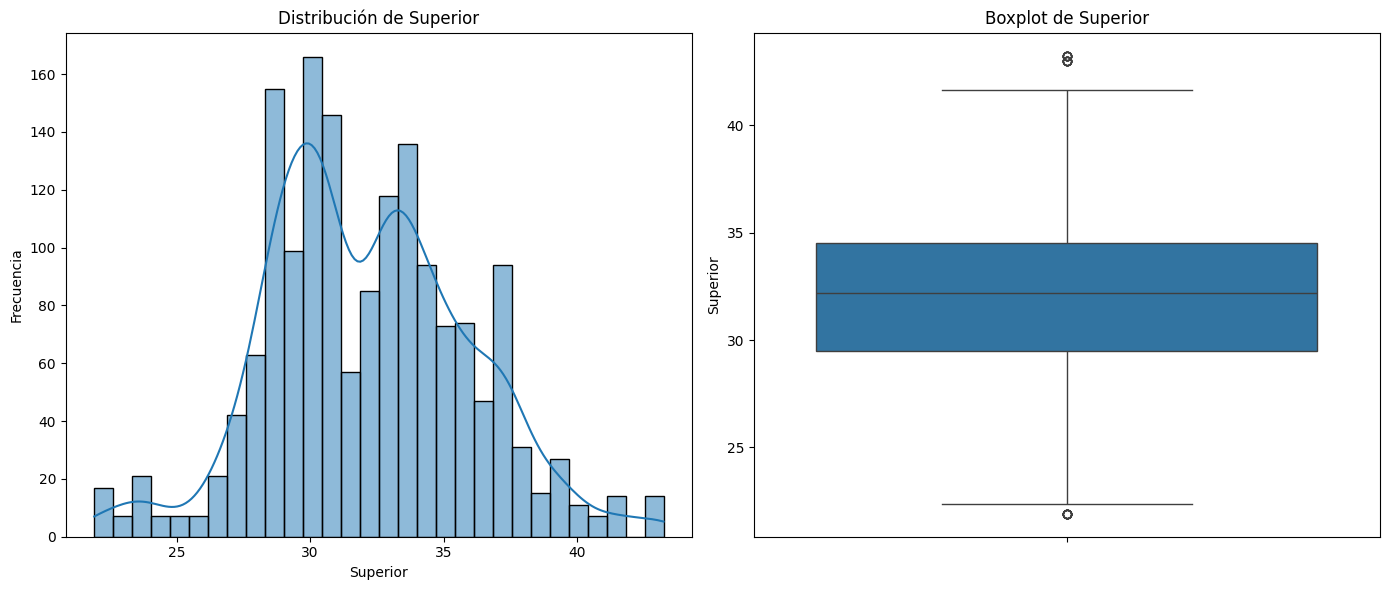

Estad√≠sticas de Distribuci√≥n para 'Superior':
  - Media: 32.15
  - Mediana: 32.19
  - Desviaci√≥n Est√°ndar: 3.82
  - Asimetr√≠a (Skewness): 0.16
  - Curtosis (Kurtosis): 0.14
  - Prueba de Normalidad (Shapiro-Wilk):
    - Estad√≠stica: 0.989, p-valor: 0.000
    - Con un nivel de significancia de 0.05, se rechaza la hip√≥tesis nula (los datos NO parecen normales).
----------------------------------------------------------------------



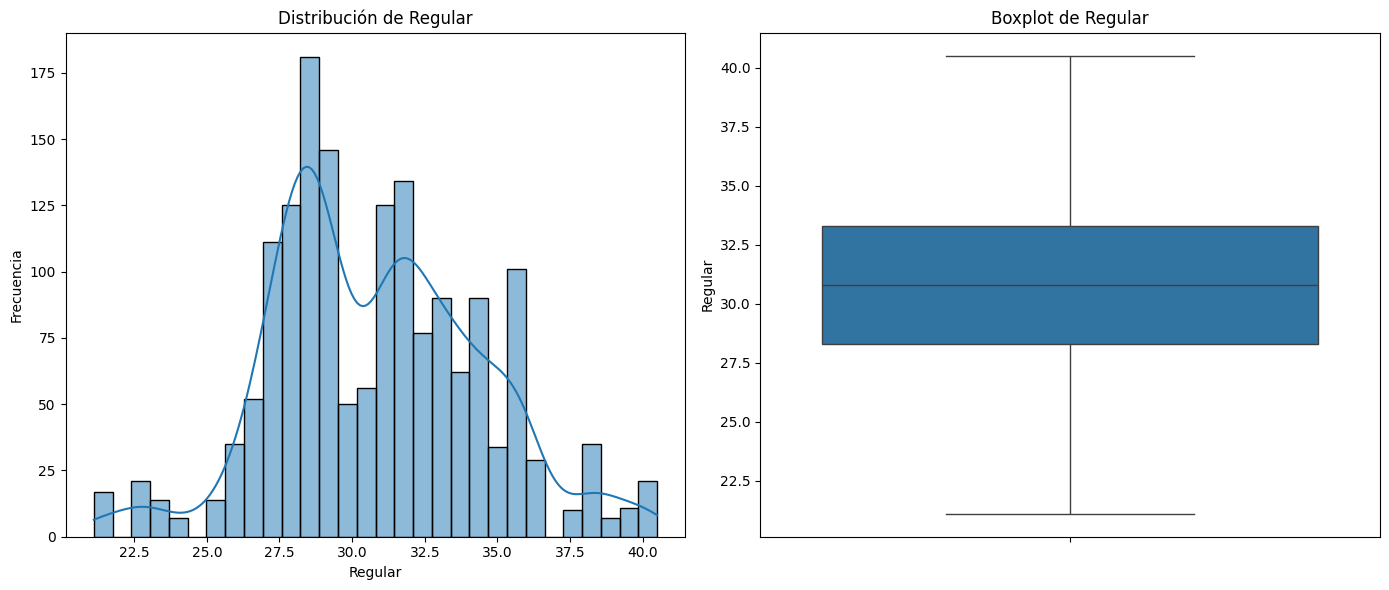

Estad√≠sticas de Distribuci√≥n para 'Regular':
  - Media: 30.84
  - Mediana: 30.78
  - Desviaci√≥n Est√°ndar: 3.61
  - Asimetr√≠a (Skewness): 0.18
  - Curtosis (Kurtosis): 0.05
  - Prueba de Normalidad (Shapiro-Wilk):
    - Estad√≠stica: 0.984, p-valor: 0.000
    - Con un nivel de significancia de 0.05, se rechaza la hip√≥tesis nula (los datos NO parecen normales).
----------------------------------------------------------------------



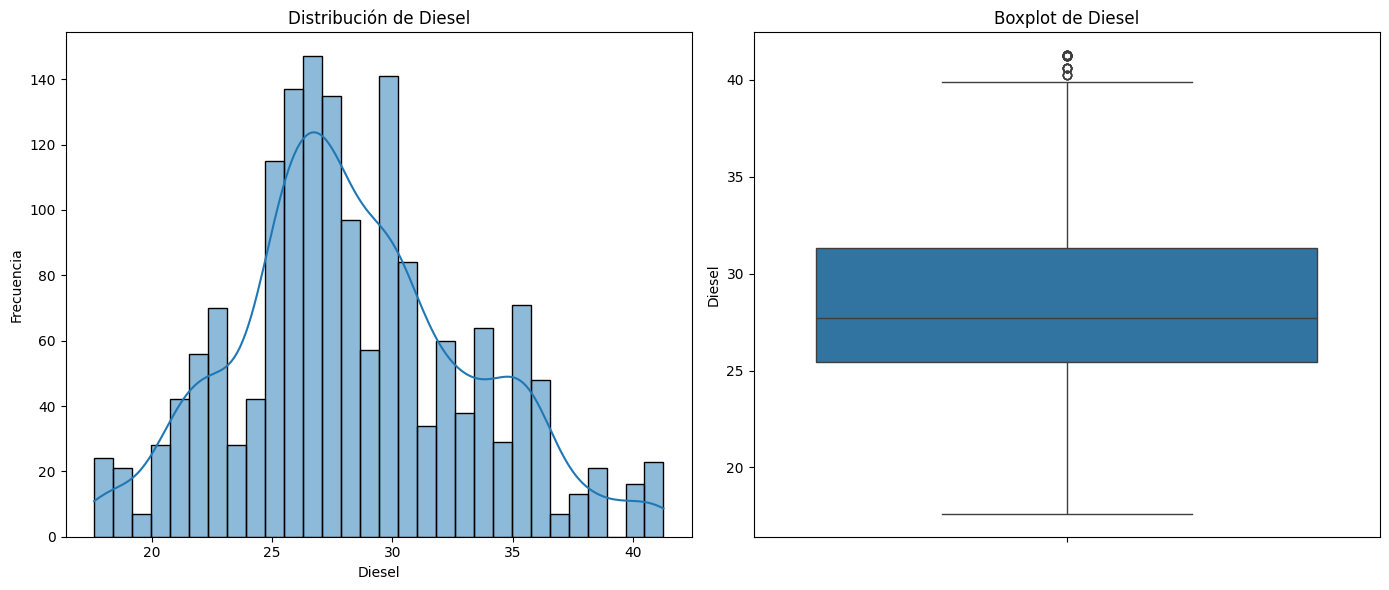

Estad√≠sticas de Distribuci√≥n para 'Diesel':
  - Media: 28.41
  - Mediana: 27.73
  - Desviaci√≥n Est√°ndar: 4.87
  - Asimetr√≠a (Skewness): 0.29
  - Curtosis (Kurtosis): -0.15
  - Prueba de Normalidad (Shapiro-Wilk):
    - Estad√≠stica: 0.987, p-valor: 0.000
    - Con un nivel de significancia de 0.05, se rechaza la hip√≥tesis nula (los datos NO parecen normales).
----------------------------------------------------------------------



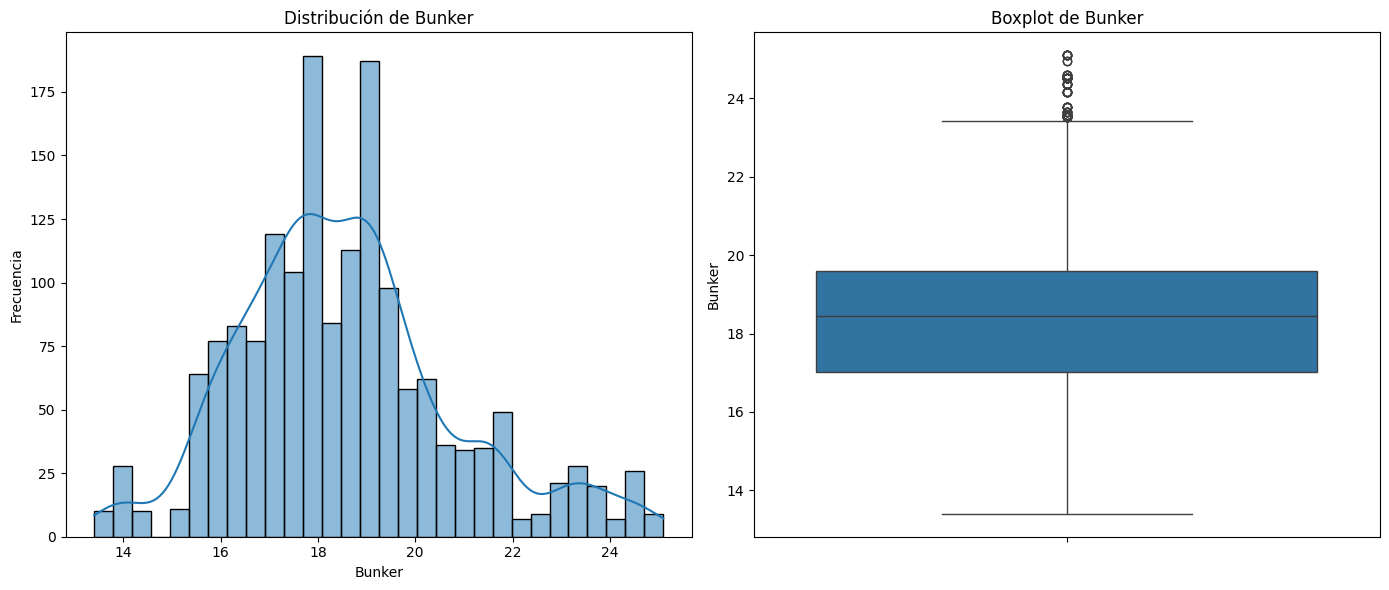

Estad√≠sticas de Distribuci√≥n para 'Bunker':
  - Media: 18.56
  - Mediana: 18.44
  - Desviaci√≥n Est√°ndar: 2.25
  - Asimetr√≠a (Skewness): 0.58
  - Curtosis (Kurtosis): 0.41
  - Prueba de Normalidad (Shapiro-Wilk):
    - Estad√≠stica: 0.970, p-valor: 0.000
    - Con un nivel de significancia de 0.05, se rechaza la hip√≥tesis nula (los datos NO parecen normales).
----------------------------------------------------------------------


----------------------------------------------------------------------

--- 3. An√°lisis de Correlaci√≥n ---

Matriz de Correlaci√≥n de Pearson:

          Superior   Regular    Diesel    Bunker
Superior  1.000000  0.991946  0.871770  0.686633
Regular   0.991946  1.000000  0.867256  0.672843
Diesel    0.871770  0.867256  1.000000  0.473921
Bunker    0.686633  0.672843  0.473921  1.000000




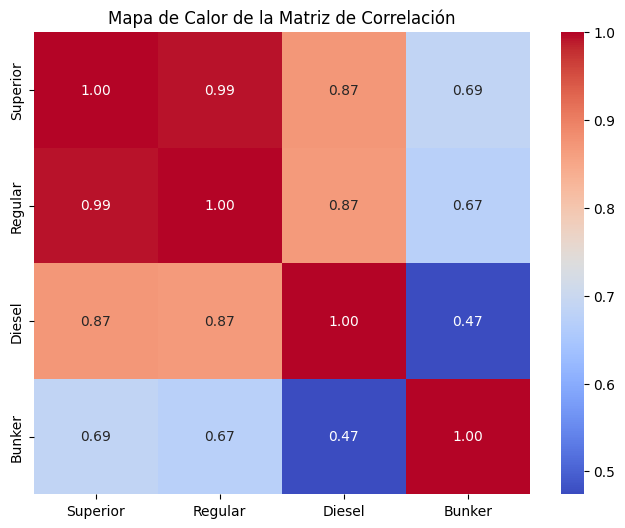

Los valores cercanos a 1 o -1 indican una fuerte correlaci√≥n positiva o negativa, respectivamente.

----------------------------------------------------------------------

--- 4. An√°lisis del Comportamiento Temporal (Anual) ---

Tendencia anual de precios (Picos por A√±o y Tipo de Combustible):



    - Pico anual para Superior: 13152.89 en el a√±o 2022
    - Valle anual para Superior: 5880.15 en el a√±o 2025



    - Pico anual para Regular: 12658.71 en el a√±o 2022
    - Valle anual para Regular: 5581.50 en el a√±o 2025



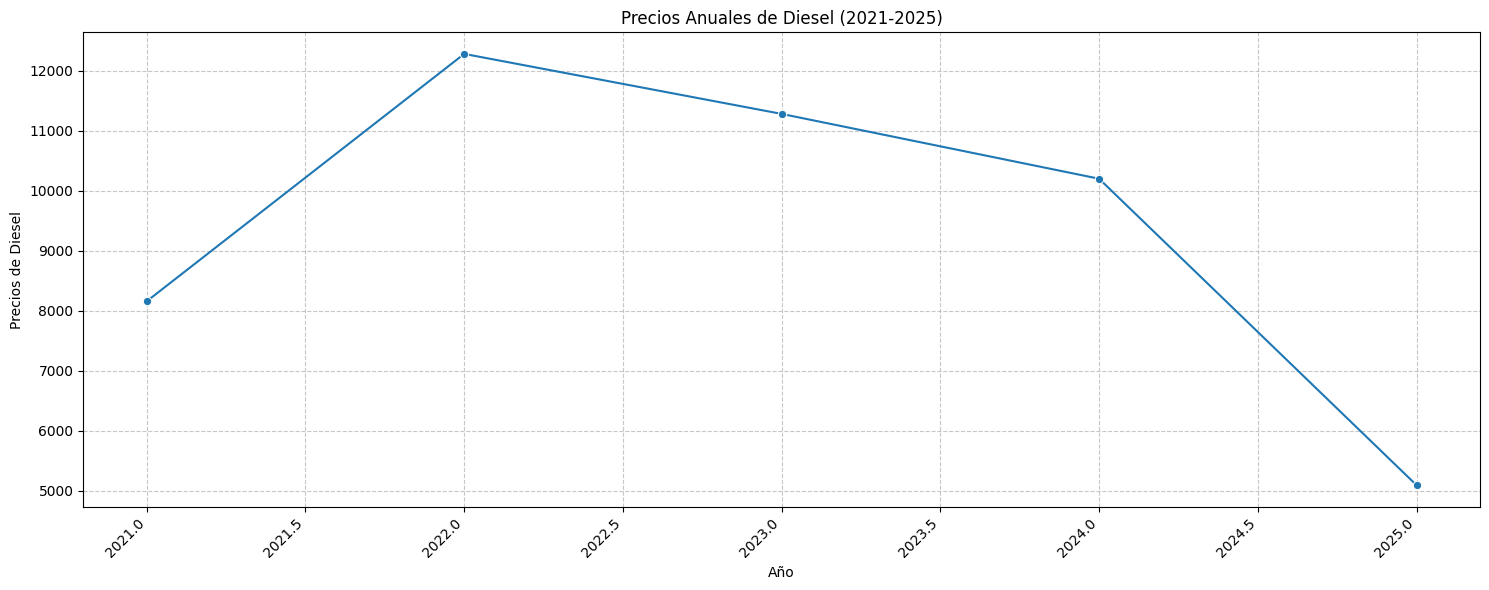

    - Pico anual para Diesel: 12280.58 en el a√±o 2022
    - Valle anual para Diesel: 5093.98 en el a√±o 2025



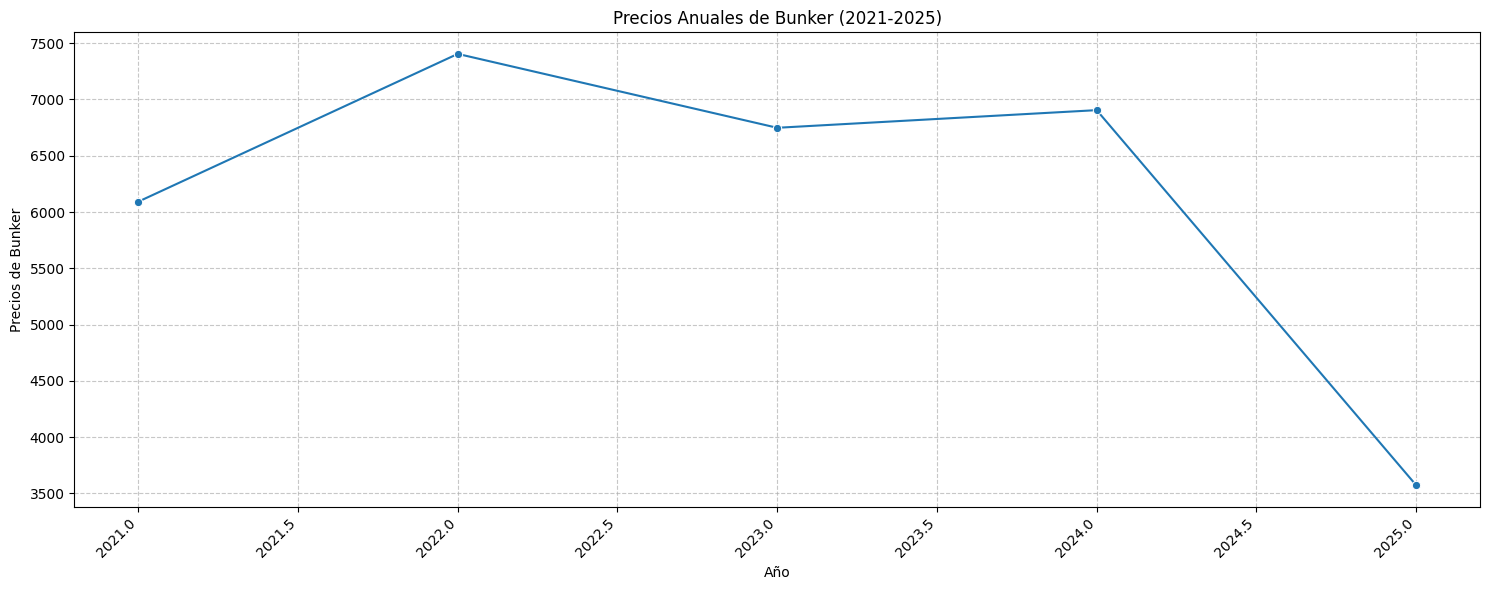

    - Pico anual para Bunker: 7404.70 en el a√±o 2022
    - Valle anual para Bunker: 3573.81 en el a√±o 2025


----------------------------------------------------------------------

--- 5. An√°lisis de Comportamiento en Per√≠odos Espec√≠ficos ---

Comportamiento en los √öltimos 5 A√±os:

  Debug: Rango de a√±os para '√∫ltimos 5': 2021-2025
  Debug: Filas en df_ultimos_a√±os: 1655


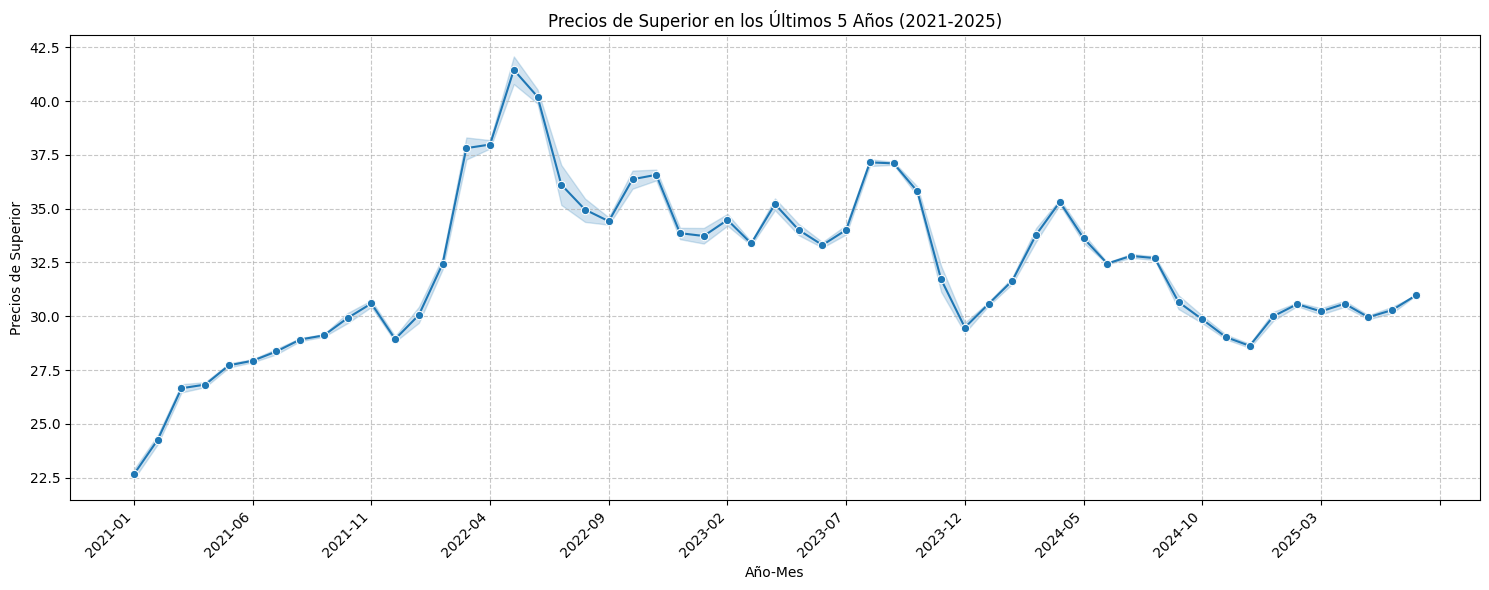

    - Tendencia de Superior en los √∫ltimos 5 a√±os.



    - Tendencia de Regular en los √∫ltimos 5 a√±os.



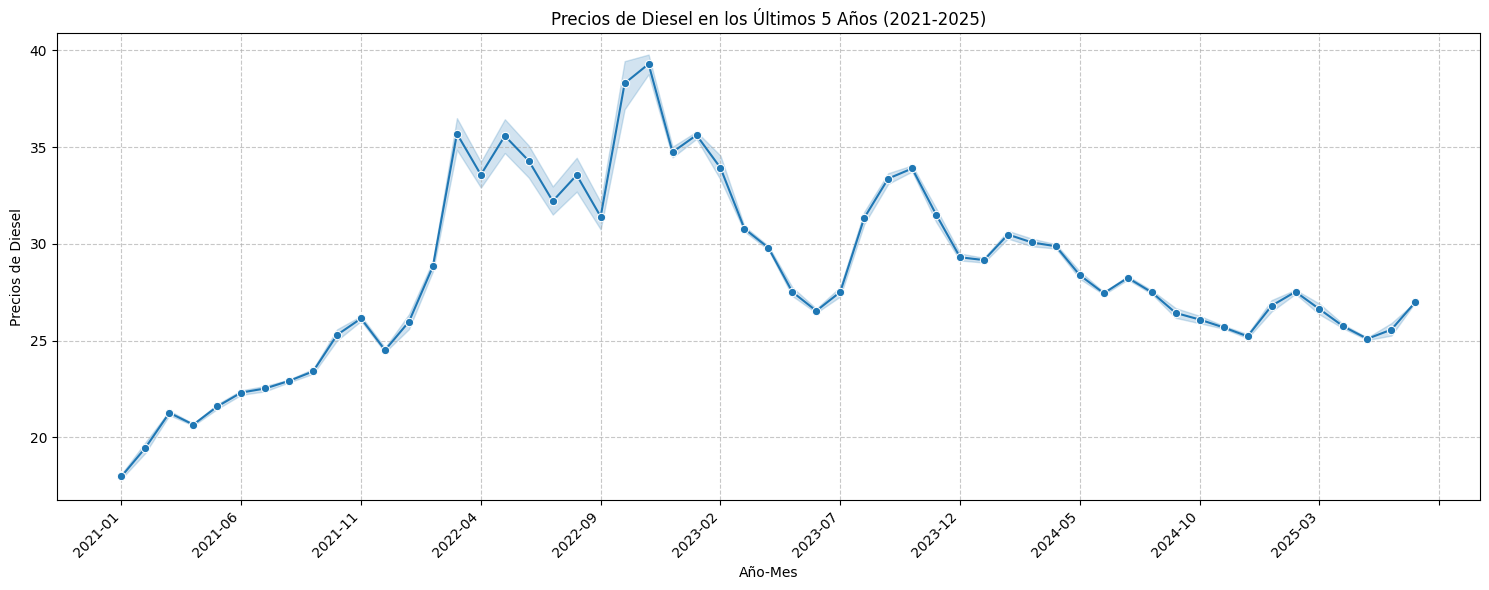

    - Tendencia de Diesel en los √∫ltimos 5 a√±os.



    - Tendencia de Bunker en los √∫ltimos 5 a√±os.


----------------------------------------------------------------------

Comportamiento Durante la Pandemia (2020-01 a 2021-12):

  Debug: Filas en df_pandemia: 365


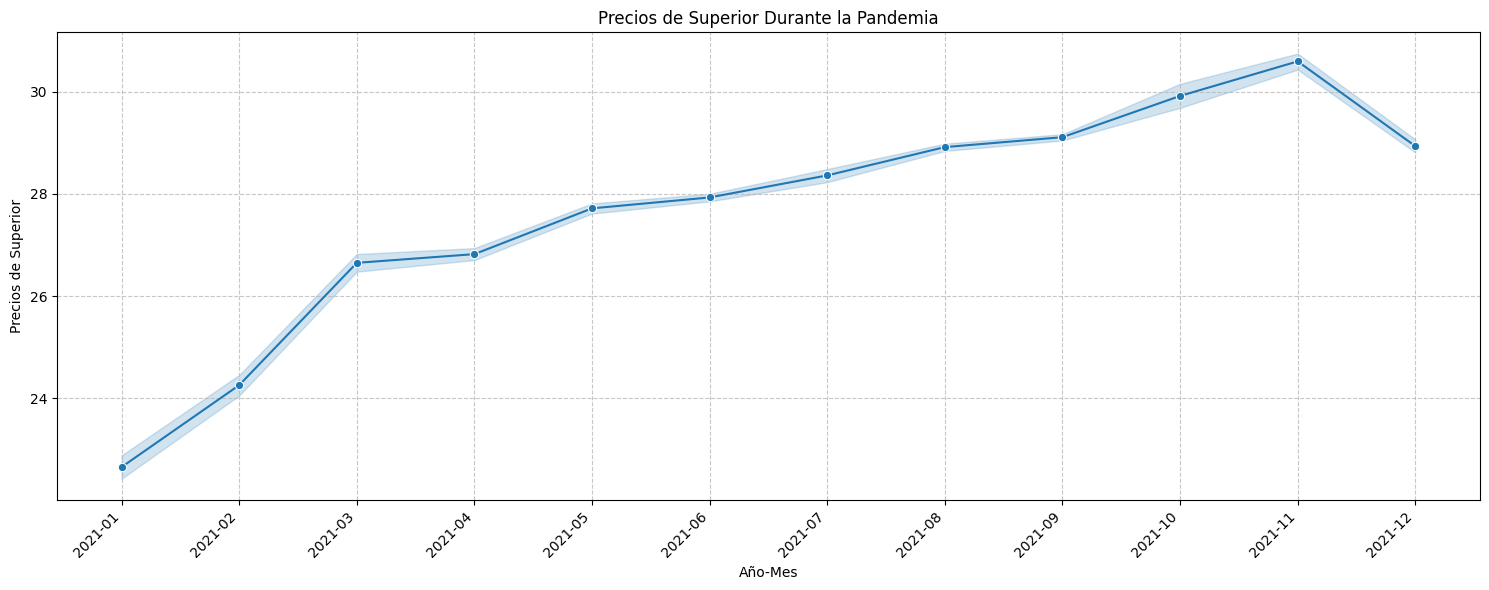

    - Tendencia de Superior durante la pandemia. Media: 27.67



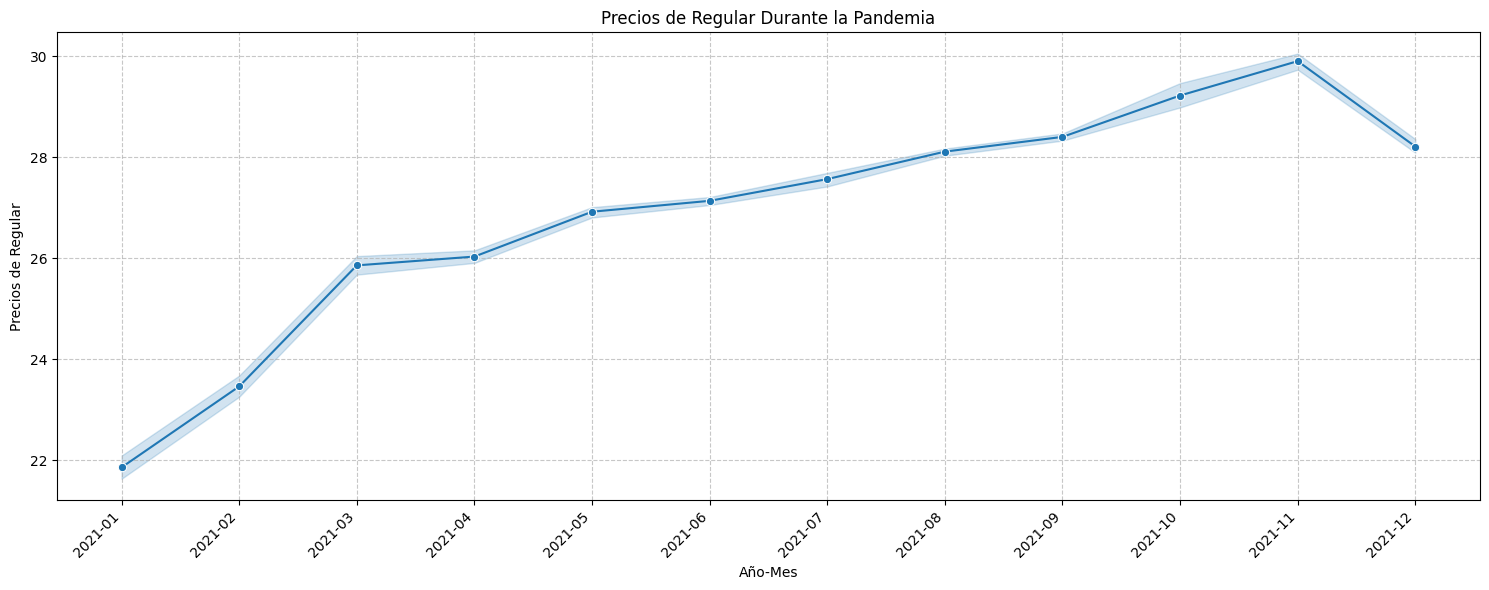

    - Tendencia de Regular durante la pandemia. Media: 26.90



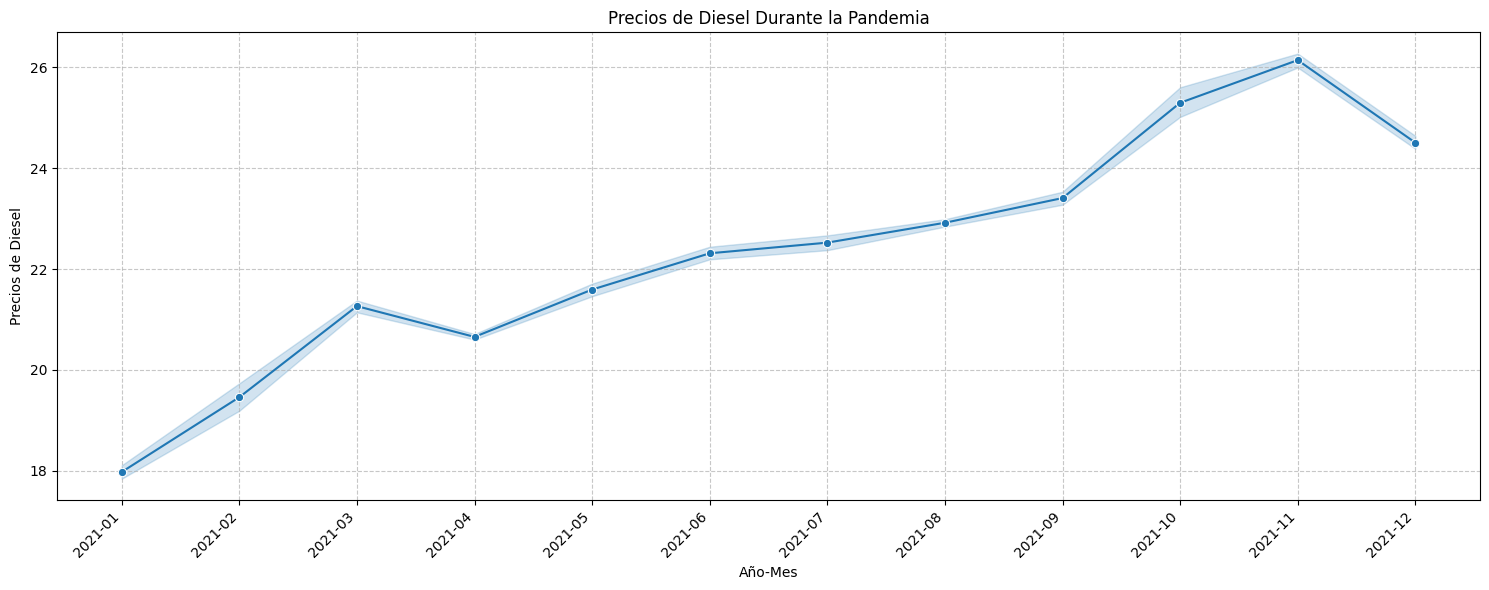

    - Tendencia de Diesel durante la pandemia. Media: 22.35



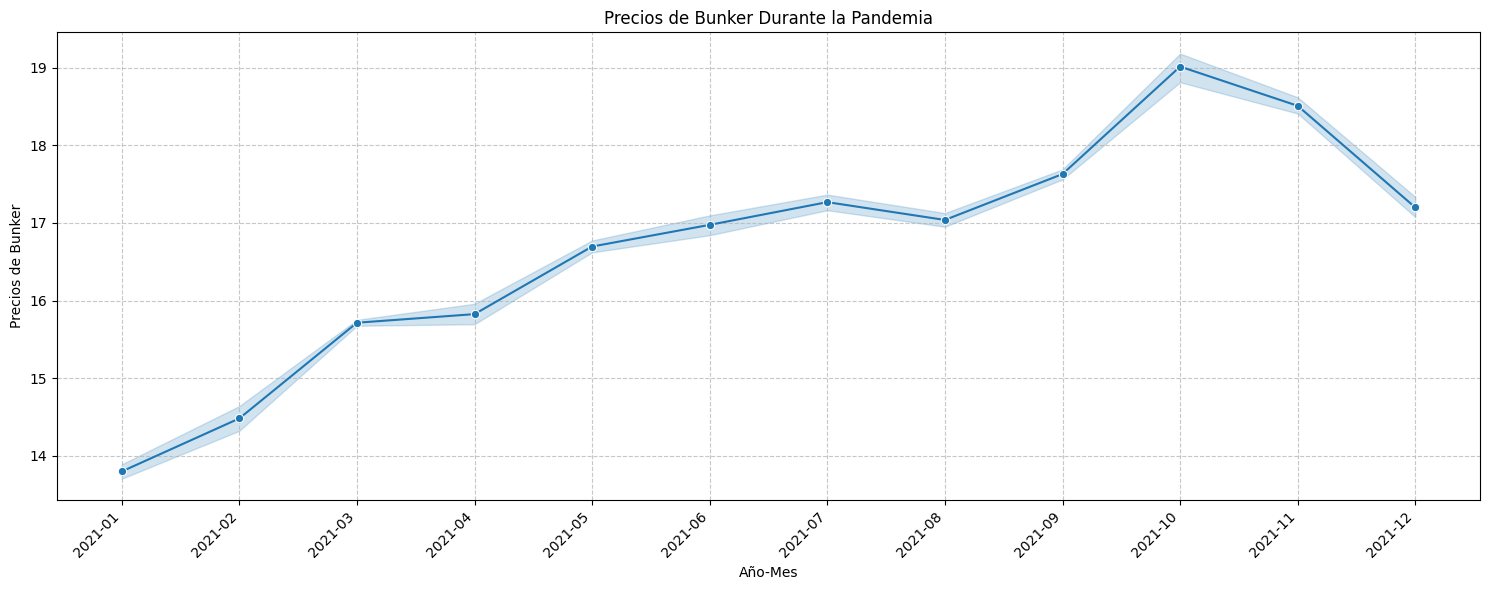

    - Tendencia de Bunker durante la pandemia. Media: 16.69


----------------------------------------------------------------------

An√°lisis Exploratorio de Datos completado. ¬°Todos los puntos cubiertos!


In [23]:

try:
    locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')
except locale.Error:
    try:
        locale.setlocale(locale.LC_TIME, 'es_ES')
    except locale.Error:
        try:
            locale.setlocale(locale.LC_TIME, 'Spanish_Spain.1252')
        except locale.Error:
            print("Advertencia: No se pudo establecer la configuraci√≥n regional en espa√±ol para el manejo de fechas. "
                  "La conversi√≥n de fechas con nombres de mes ('ene', 'feb') podr√≠a fallar.")
            print("Por favor, verifica las opciones de locale para tu sistema operativo.")


def exploracion_eda(df, columnas_seleccionadas, columna_fecha):
    """
    Realiza un an√°lisis exploratorio de datos (EDA) en columnas espec√≠ficas de un DataFrame,
    incluyendo distribuci√≥n, correlaci√≥n, histogramas de fecha y an√°lisis de requisitos espec√≠ficos.

    Args:
        df (pd.DataFrame): El DataFrame de Pandas a analizar.
        columnas_seleccionadas (list): Una lista de las 4 columnas espec√≠ficas a analizar (o m√°s).
        columna_fecha (str): El nombre de la columna que contiene los datos de fecha.
    """

    print("Iniciando An√°lisis Exploratorio de Datos (EDA)\n")

    # Verificar que las columnas existan en el DataFrame
    for col in columnas_seleccionadas + [columna_fecha]:
        if col not in df.columns:
            print(f"Error: La columna '{col}' no se encuentra en el DataFrame. Por favor, verifica los nombres.")
            return

    df_seleccionado = df[columnas_seleccionadas + [columna_fecha]].copy()

    # Convertir la columna de fecha a formato datetime
    try:
        df_seleccionado[columna_fecha] = pd.to_datetime(df_seleccionado[columna_fecha], format='%b/%Y')
        print(f"Columna '{columna_fecha}' convertida a tipo: {df_seleccionado[columna_fecha].dtype}\n")
    except Exception as e:
        print(f"Error CR√çTICO: No se pudo convertir la columna '{columna_fecha}' a datetime con el formato '%b/%Y'.")
        print(f"Mensaje de error: {e}")
        print("Aseg√∫rate de que las fechas en tu Excel tengan el formato 'mes_abreviado/a√±o' (ej. 'ene/2001') "
              "y que la configuraci√≥n regional en espa√±ol se haya aplicado correctamente.")
        return # Salir si la fecha no se puede convertir, ya que muchas partes dependen de ello

    print(f"Columnas seleccionadas para el an√°lisis: {columnas_seleccionadas} y {columna_fecha}\n")

    # --- 1. Informaci√≥n General y Estad√≠sticas Descriptivas ---
    print("--- 1. Informaci√≥n General y Estad√≠sticas Descriptivas ---\n")
    print("Informaci√≥n del DataFrame (primeras filas):\n")
    print(df_seleccionado.head())
    print("\n")

    print("Estad√≠sticas descriptivas de las columnas seleccionadas:\n")
    print(df_seleccionado[columnas_seleccionadas].describe().T)
    print("\n")

    print("Valores nulos por columna:\n")
    print(df_seleccionado[columnas_seleccionadas + [columna_fecha]].isnull().sum())
    print("\n" + "-"*70 + "\n")

    # --- 2. An√°lisis de Distribuci√≥n (Histogramas, Boxplots y Pruebas de Normalidad) ---
    print("--- 2. An√°lisis de Distribuci√≥n (Histogramas, Boxplots y Pruebas de Normalidad) ---\n")
    numeric_cols = df_seleccionado[columnas_seleccionadas].select_dtypes(include=np.number).columns.tolist()

    if not numeric_cols:
        print("No hay columnas num√©ricas continuas entre las seleccionadas para el an√°lisis de distribuci√≥n.")
    else:
        for col in numeric_cols:
            plt.figure(figsize=(14, 6))

            # Histograma
            plt.subplot(1, 2, 1)
            sns.histplot(df_seleccionado[col].dropna(), kde=True, bins=30)
            plt.title(f'Distribuci√≥n de {col}')
            plt.xlabel(col)
            plt.ylabel('Frecuencia')

            # Boxplot
            plt.subplot(1, 2, 2)
            sns.boxplot(y=df_seleccionado[col].dropna())
            plt.title(f'Boxplot de {col}')
            plt.ylabel(col)

            plt.tight_layout()
            plt.show()

            print(f"Estad√≠sticas de Distribuci√≥n para '{col}':")
            print(f"  - Media: {df_seleccionado[col].mean():.2f}")
            print(f"  - Mediana: {df_seleccionado[col].median():.2f}")
            print(f"  - Desviaci√≥n Est√°ndar: {df_seleccionado[col].std():.2f}")
            print(f"  - Asimetr√≠a (Skewness): {df_seleccionado[col].skew():.2f}")
            print(f"  - Curtosis (Kurtosis): {df_seleccionado[col].kurtosis():.2f}")

            # Prueba de normalidad (Shapiro-Wilk para N < 5000, D'Agostino-Pearson para N >= 20)
            data_to_test = df_seleccionado[col].dropna()
            if len(data_to_test) >= 20: # Tama√±o m√≠nimo para las pruebas
                if len(data_to_test) < 5000:
                    try:
                        stat, p = shapiro(data_to_test)
                        test_name = "Shapiro-Wilk"
                    except Exception as test_e:
                        print(f"  - Error al ejecutar Shapiro-Wilk: {test_e}. Intentando D'Agostino-Pearson.")
                        stat, p = normaltest(data_to_test)
                        test_name = "D'Agostino-Pearson"
                else:
                    stat, p = normaltest(data_to_test) # D'Agostino-Pearson
                    test_name = "D'Agostino-Pearson"

                print(f"  - Prueba de Normalidad ({test_name}):")
                print(f"    - Estad√≠stica: {stat:.3f}, p-valor: {p:.3f}")
                alpha = 0.05
                if p > alpha:
                    print(f"    - Con un nivel de significancia de {alpha}, no se puede rechazar la hip√≥tesis nula (los datos parecen normales).")
                else:
                    print(f"    - Con un nivel de significancia de {alpha}, se rechaza la hip√≥tesis nula (los datos NO parecen normales).")
            else:
                print("  - No hay suficientes datos para realizar una prueba de normalidad formal (se necesitan al menos 20 observaciones).")

            print("-" * 70 + "\n")
    print("\n" + "-"*70 + "\n")

    # --- 3. An√°lisis de Correlaci√≥n (entre columnas num√©ricas) ---
    print("--- 3. An√°lisis de Correlaci√≥n ---\n")
    if len(numeric_cols) > 1:
        corr_matrix = df_seleccionado[numeric_cols].corr()
        print("Matriz de Correlaci√≥n de Pearson:\n")
        print(corr_matrix)
        print("\n")

        plt.figure(figsize=(8, 6))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Mapa de Calor de la Matriz de Correlaci√≥n')
        plt.show()
        print("Los valores cercanos a 1 o -1 indican una fuerte correlaci√≥n positiva o negativa, respectivamente.")
    else:
        print("Se necesitan al menos dos columnas num√©ricas para calcular la correlaci√≥n.")
    print("\n" + "-"*70 + "\n")

    # --- 4. Comportamiento Temporal (Agrupado por A√±o y Mes Estacional) ---
    print(f"--- 4. An√°lisis del Comportamiento Temporal (Anual) ---\n")
    if not numeric_cols:
        print(f"No hay columnas num√©ricas continuas para graficar con '{columna_fecha}'.")
    elif not pd.api.types.is_datetime64_any_dtype(df_seleccionado[columna_fecha]):
        print(f"La columna '{columna_fecha}' no es un tipo de dato datetime v√°lido. No se puede generar la tendencia temporal.")
        return # *** A√ëADIDO: Si la fecha no es datetime, salimos de esta secci√≥n. ***
    else:
        # Agregaci√≥n anual para picos anuales
        df_seleccionado['a√±o'] = df_seleccionado[columna_fecha].dt.year
        # Es mejor usar .sum() para precios totales anuales
        df_anual = df_seleccionado.groupby('a√±o')[numeric_cols].sum().reset_index()

        print("Tendencia anual de precios (Picos por A√±o y Tipo de Combustible):\n")
        for col in numeric_cols:
            plt.figure(figsize=(15, 6))
            sns.lineplot(x=df_anual['a√±o'], y=df_anual[col], marker='o')
            plt.title(f'Precios Anuales de {col} ({df_anual["a√±o"].min()}-{df_anual["a√±o"].max()})')
            plt.xlabel('A√±o')
            plt.ylabel(f'Precios de {col}')
            plt.xticks(rotation=45, ha='right')
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
            
            # Manejo de casos donde idxmax/idxmin podr√≠an devolver NaN si la columna tiene solo NaNs
            if not df_anual[col].isnull().all():
                max_anual = df_anual.loc[df_anual[col].idxmax()]
                min_anual = df_anual.loc[df_anual[col].idxmin()]
                print(f"    - Pico anual para {col}: {max_anual[col]:.2f} en el a√±o {int(max_anual['a√±o'])}")
                print(f"    - Valle anual para {col}: {min_anual[col]:.2f} en el a√±o {int(min_anual['a√±o'])}\n")
            else:
                print(f"    - No hay datos v√°lidos para {col} en el an√°lisis anual.\n")
        print("\n" + "-"*70 + "\n")


    # --- 5. Comportamiento en los √∫ltimos X a√±os y durante la Pandemia ---
    print("--- 5. An√°lisis de Comportamiento en Per√≠odos Espec√≠ficos ---\n")

    # Asegurarse de que 'a√±o' est√© presente antes de usarlo en esta secci√≥n
    if 'a√±o' not in df_seleccionado.columns:
        df_seleccionado['a√±o'] = df_seleccionado[columna_fecha].dt.year

    # Comportamiento en los √∫ltimos X a√±os
    a√±os_recientes = 5 # Puedes ajustar este valor si quieres ver m√°s o menos a√±os
    print(f"Comportamiento en los √öltimos {a√±os_recientes} A√±os:\n")
    
    a√±o_actual = df_seleccionado['a√±o'].max() # Usar la columna 'a√±o' ya creada
    a√±o_inicio_reciente = a√±o_actual - a√±os_recientes + 1
    
    df_ultimos_a√±os = df_seleccionado[df_seleccionado['a√±o'] >= a√±o_inicio_reciente].copy()

    print(f"  Debug: Rango de a√±os para '√∫ltimos {a√±os_recientes}': {a√±o_inicio_reciente}-{a√±o_actual}")
    print(f"  Debug: Filas en df_ultimos_a√±os: {len(df_ultimos_a√±os)}")

    if not df_ultimos_a√±os.empty:
        df_ultimos_a√±os['a√±o_mes'] = df_ultimos_a√±os[columna_fecha].dt.to_period('M')
        df_ultimos_a√±os = df_ultimos_a√±os.sort_values(by=columna_fecha)

        for col in numeric_cols:
            plt.figure(figsize=(15, 6))
            sns.lineplot(x=df_ultimos_a√±os['a√±o_mes'].astype(str), y=df_ultimos_a√±os[col], marker='o')
            plt.title(f'Precios de {col} en los √öltimos {a√±os_recientes} A√±os ({a√±o_inicio_reciente}-{a√±o_actual})')
            plt.xlabel('A√±o-Mes')
            plt.ylabel(f'Precios de {col}')
            plt.xticks(rotation=45, ha='right')
            # Ajustar ticks del eje X para que no se superpongan si hay muchos meses
            unique_months_in_period = df_ultimos_a√±os['a√±o_mes'].unique()
            if len(unique_months_in_period) > 12 * 2: # Si hay m√°s de 24 meses, reducir ticks
                 plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=12)) # Mostrar 12 ticks m√°ximo
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
            print(f"    - Tendencia de {col} en los √∫ltimos {a√±os_recientes} a√±os.\n")
    else:
        print(f"    - No hay datos disponibles para los √∫ltimos {a√±os_recientes} a√±os "
              f"({a√±o_inicio_reciente}-{a√±o_actual}) en tu DataFrame.")
    print("\n" + "-"*70 + "\n")

    # Comportamiento durante la pandemia
    # Definir el per√≠odo de la pandemia. Puedes ajustarlo si es necesario.
    fecha_inicio_pandemia = pd.to_datetime('2020-01-01')
    fecha_fin_pandemia = pd.to_datetime('2021-12-31')

    df_pandemia = df_seleccionado[(df_seleccionado[columna_fecha] >= fecha_inicio_pandemia) &
                                  (df_seleccionado[columna_fecha] <= fecha_fin_pandemia)].copy()

    print(f"Comportamiento Durante la Pandemia ({fecha_inicio_pandemia.strftime('%Y-%m')} a {fecha_fin_pandemia.strftime('%Y-%m')}):\n")
    print(f"  Debug: Filas en df_pandemia: {len(df_pandemia)}")

    if not df_pandemia.empty:
        df_pandemia['a√±o_mes'] = df_pandemia[columna_fecha].dt.to_period('M')
        df_pandemia = df_pandemia.sort_values(by=columna_fecha)

        for col in numeric_cols:
            plt.figure(figsize=(15, 6))
            sns.lineplot(x=df_pandemia['a√±o_mes'].astype(str), y=df_pandemia[col], marker='o')
            plt.title(f'Precios de {col} Durante la Pandemia')
            plt.xlabel('A√±o-Mes')
            plt.ylabel(f'Precios de {col}')
            plt.xticks(rotation=45, ha='right')
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
            print(f"    - Tendencia de {col} durante la pandemia. Media: {df_pandemia[col].mean():.2f}\n")
    else:
        print(f"    - No hay datos disponibles para el per√≠odo de la pandemia especificado "
              f"({fecha_inicio_pandemia.strftime('%Y-%m')} a {fecha_fin_pandemia.strftime('%Y-%m')}) en tu DataFrame.")
    print("\n" + "-"*70 + "\n")

    print("An√°lisis Exploratorio de Datos completado. ¬°Todos los puntos cubiertos!")

# --- BLOQUE PRINCIPAL PARA CARGAR Y EJECUTAR EL AN√ÅLISIS ---
if __name__ == '__main__':
    # --- CONFIGURACI√ìN PARA TU ARCHIVO DE EXCEL ---
    # 1. **Ruta del Archivo de Excel:** Reemplaza con la ruta completa a tu archivo.
    #    En Windows, usa barras invertidas dobles (\\) o barras diagonales (/).
    ruta_archivo_excel = "C:/Users/ricar/Downloads/Precios.xlsx"

    # 2. **Nombre de la Hoja:** Si tus datos no est√°n en la primera hoja.
    nombre_hoja_excel = 'Hoja1'

    # 3. **Columnas a Analizar:** Los nombres EXACTOS de tus columnas num√©ricas.
    mis_columnas_a_analizar = ['Superior', 'Regular', 'Diesel', 'Bunker']

    # 4. **Columna de Fecha:** El nombre EXACTO de tu columna de fecha.
    mi_columna_fecha_excel = 'FECHA'

    print(f"Intentando cargar archivo Excel desde: {ruta_archivo_excel}")
    print(f"Usando hoja: {nombre_hoja_excel}")
    print(f"Columnas seleccionadas: {mis_columnas_a_analizar}")
    print(f"Columna de fecha: {mi_columna_fecha_excel}\n")

    try:
        df_desde_excel = pd.read_excel(ruta_archivo_excel, sheet_name=nombre_hoja_excel)
        print("Archivo de Excel cargado exitosamente.\n")

        # Llamar a la funci√≥n de an√°lisis exploratorio
        exploracion_eda(df_desde_excel, mis_columnas_a_analizar, mi_columna_fecha_excel)

    except FileNotFoundError:
        print(f"Error: El archivo '{ruta_archivo_excel}' no se encontr√≥.")
        print("Por favor, verifica la ruta y el nombre del archivo.")
    except Exception as e:
        print(f"Ocurri√≥ un error inesperado al cargar el archivo de Excel o durante el an√°lisis: {e}")
        print("Aseg√∫rate de que la ruta, el nombre de la hoja y los nombres de las columnas sean correctos.")

# Preparaci√≥n para las series de tiempo

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
from statsmodels.tsa.arima.model import ARIMA # Para modelos ARIMA
from statsmodels.tsa.forecasting.stl import STL # Para descomposici√≥n de series temporales

# --- CONFIGURACI√ìN REGIONAL PARA INTERPRETAR MESES EN ESPA√ëOL ---
try:
    locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')
except locale.Error:
    try:
        locale.setlocale(locale.LC_TIME, 'es_ES')
    except locale.Error:
        try:
            locale.setlocale(locale.LC_TIME, 'Spanish_Spain.1252')
        except locale.Error:
            print("‚ö†Ô∏è Advertencia: No se pudo establecer la configuraci√≥n regional en espa√±ol para el manejo de fechas. "
                  "La conversi√≥n de fechas con nombres de mes ('ene', 'feb') podr√≠a fallar.")
            print("Por favor, verifica las opciones de locale para tu sistema operativo.")

# --- Carga de Datos (Necesaria para los siguientes puntos) ---
# Define la ruta a tu archivo y las columnas
ruta_archivo_excel = "C:/Users/ricar/Downloads/Precios.xlsx"
nombre_hoja_excel = 'Hoja1'
mis_columnas_a_analizar = ['Superior', 'Regular', 'Diesel', 'Bunker']
mi_columna_fecha_excel = 'FECHA'

try:
    df_importaciones = pd.read_excel(ruta_archivo_excel, sheet_name=nombre_hoja_excel)
    # Convertir la columna de fecha a formato datetime
    df_importaciones[mi_columna_fecha_excel] = pd.to_datetime(df_importaciones[mi_columna_fecha_excel], format='%b/%Y')
    df_importaciones = df_importaciones.set_index(mi_columna_fecha_excel) # Establecer la fecha como √≠ndice
    df_importaciones = df_importaciones[mis_columnas_a_analizar] # Seleccionar solo las columnas de inter√©s
    print("‚úÖ DataFrame de Precios cargado y preprocesado exitosamente.\n")
    print("Primeras 5 filas del DataFrame de Precios:")
    print(df_importaciones.head())
    print("\n")
except FileNotFoundError:
    print(f"‚ùå Error: El archivo '{ruta_archivo_excel}' no se encontr√≥. Verifica la ruta.")
    df_importaciones = pd.DataFrame() # Crear un DataFrame vac√≠o para evitar errores posteriores
except Exception as e:
    print(f"‚ùå Ocurri√≥ un error al cargar o procesar el archivo de Excel: {e}")
    df_importaciones = pd.DataFrame() # Crear un DataFrame vac√≠o para evitar errores posteriores

‚úÖ DataFrame de Precios cargado y preprocesado exitosamente.

Primeras 5 filas del DataFrame de Precios:
            Superior  Regular  Diesel  Bunker
FECHA                                        
2021-01-01     21.91    21.11   17.61   13.40
2021-01-02     21.91    21.11   17.61   13.40
2021-01-03     21.91    21.11   17.61   13.40
2021-01-04     21.91    21.11   17.61   13.45
2021-01-05     21.91    21.11   17.61   13.45




--- 2.b: Precios Mensuales de Combustibles (Series Temporales) ---



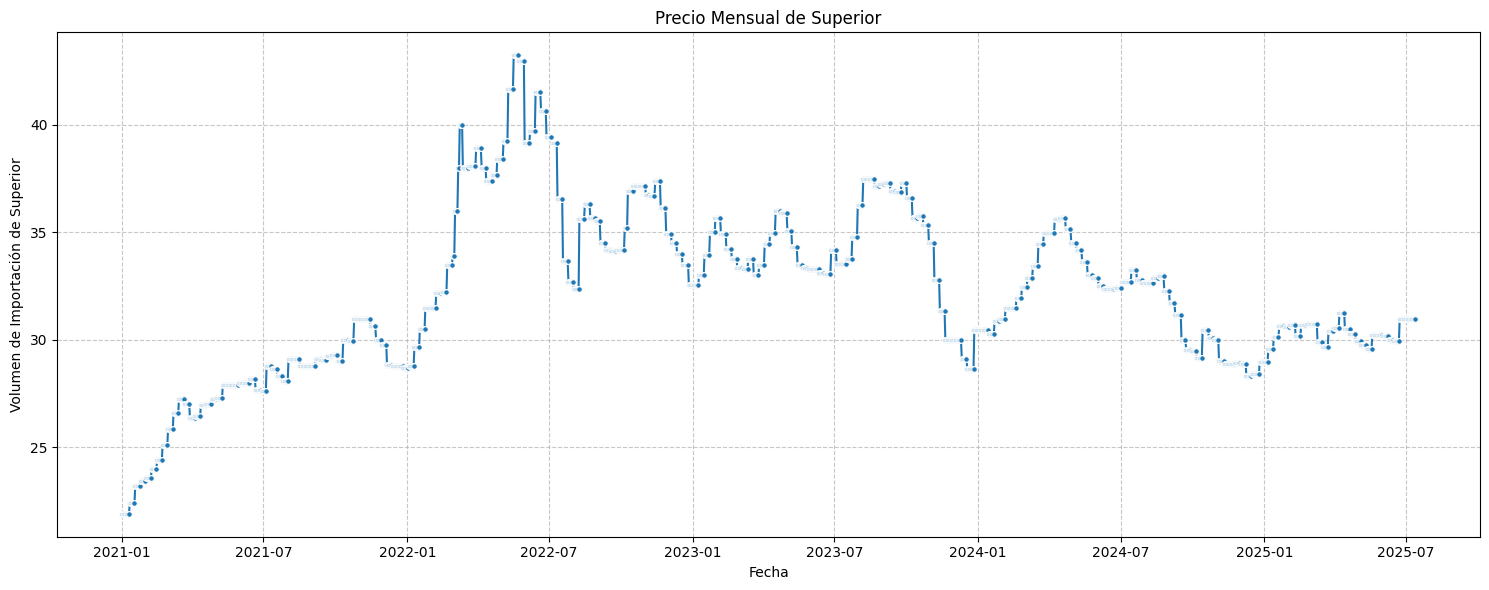

üìà Gr√°fico de la serie de Importaci√≥n Mensual de Superior generado.
Estad√≠sticas descriptivas de la serie Superior:
count    1655.000000
mean       32.149142
std         3.816833
min        21.910000
25%        29.510000
50%        32.190000
75%        34.515000
max        43.240000
Name: Superior, dtype: float64
----------------------------------------------------------------------



üìà Gr√°fico de la serie de Importaci√≥n Mensual de Regular generado.
Estad√≠sticas descriptivas de la serie Regular:
count    1655.000000
mean       30.841692
std         3.611342
min        21.110000
25%        28.280000
50%        30.780000
75%        33.280000
max        40.500000
Name: Regular, dtype: float64
----------------------------------------------------------------------



üìà Gr√°fico de la serie de Importaci√≥n Mensual de Diesel generado.
Estad√≠sticas descriptivas de la serie Diesel:
count    1655.000000
mean       28.407299
std         4.870410
min        17.610000
25%        25.440000
50%        27.730000
75%        31.300000
max        41.270000
Name: Diesel, dtype: float64
----------------------------------------------------------------------



üìà Gr√°fico de la serie de Importaci√≥n Mensual de Bunker generado.
Estad√≠sticas descriptivas de la serie Bunker:
count    1655.000000
mean       18.564263
std         2.245966
min        13.400000
25%        17.020000
50%        18.440000
75%        19.590000
max        25.100000
Name: Bunker, dtype: float64
----------------------------------------------------------------------



In [25]:
## 2.b: Precios Mensuales de Combustibles
print("--- 2.b: Precios Mensuales de Combustibles (Series Temporales) ---\n")

if not df_importaciones.empty:
    for col in df_importaciones.columns:
        plt.figure(figsize=(15, 6))
        # Usamos df_importaciones directamente ya que su √≠ndice es la fecha
        sns.lineplot(x=df_importaciones.index, y=df_importaciones[col], marker='o', markersize=4)
        plt.title(f'Precio Mensual de {col}')
        plt.xlabel('Fecha')
        plt.ylabel(f'Volumen de Importaci√≥n de {col}')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
        print(f"üìà Gr√°fico de la serie de Importaci√≥n Mensual de {col} generado.")
        print(f"Estad√≠sticas descriptivas de la serie {col}:")
        print(df_importaciones[col].describe())
        print("-" * 70 + "\n")
else:
    print("‚ùå No se pudo cargar el DataFrame de precios. No se pueden generar las series mensuales.")

## Punto 3

In [50]:
## 3.a: Especificar Inicio, Fin y Frecuencia de la Serie de Importaciones
print("--- 3.a: Especificaci√≥n de Inicio, Fin y Frecuencia de la Serie de Precios ---\n")

if not df_importaciones.empty:
    for col in df_importaciones.columns:
        print(f"üìä Serie: {col}")
        print(f"  - Fecha de Inicio: {df_importaciones.index.min().strftime('%Y-%m-%d')}")
        print(f"  - Fecha de Fin: {df_importaciones.index.max().strftime('%Y-%m-%d')}")
        
        # Calcular la frecuencia. Asumimos mensual ('MS' por Month Start) dado el formato.
        # pd.infer_freq() puede ayudar, pero si sabemos que es mensual, podemos afirmarlo.
        inferred_freq = pd.infer_freq(df_importaciones.index)
        print(f"  - Frecuencia Inferida: {inferred_freq}")
        
        # Si la frecuencia es mensual (ej. 'MS'), tambi√©n podemos calcular el n√∫mero total de meses
        num_meses = (df_importaciones.index.max().to_period('M') - df_importaciones.index.min().to_period('M')).n + 1
        print(f"  - N√∫mero Total de Meses: {num_meses}")
        print("-" * 50 + "\n")
else:
    print("‚ùå El DataFrame de precios est√° vac√≠o. No se pueden especificar inicio, fin y frecuencia.")

--- 3.a: Especificaci√≥n de Inicio, Fin y Frecuencia de la Serie de Precios ---

üìä Serie: Superior
  - Fecha de Inicio: 2021-01-01
  - Fecha de Fin: 2025-07-13
  - Frecuencia Inferida: D
  - N√∫mero Total de Meses: 55
--------------------------------------------------

üìä Serie: Regular
  - Fecha de Inicio: 2021-01-01
  - Fecha de Fin: 2025-07-13
  - Frecuencia Inferida: D
  - N√∫mero Total de Meses: 55
--------------------------------------------------

üìä Serie: Diesel
  - Fecha de Inicio: 2021-01-01
  - Fecha de Fin: 2025-07-13
  - Frecuencia Inferida: D
  - N√∫mero Total de Meses: 55
--------------------------------------------------

üìä Serie: Bunker
  - Fecha de Inicio: 2021-01-01
  - Fecha de Fin: 2025-07-13
  - Frecuencia Inferida: D
  - N√∫mero Total de Meses: 55
--------------------------------------------------



--- 3.b: Gr√°fico de la serie y an√°lisis inicial ---



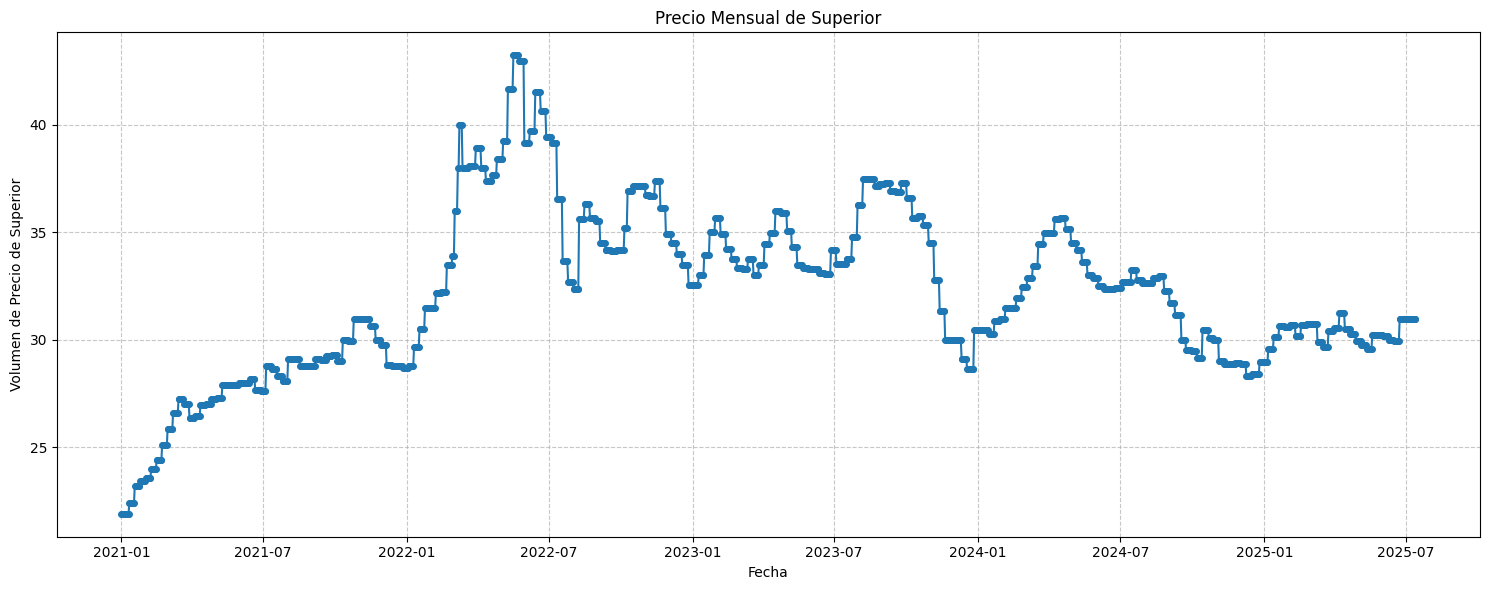

üìà Gr√°fico de la serie de Superior generado. A primera vista, se pueden observar:
  - Tendencia general: Superior muestra estabilidad a lo largo del tiempo.
  - Variabilidad: Hay fluctuaciones moderadas en los datos.
----------------------------------------------------------------------



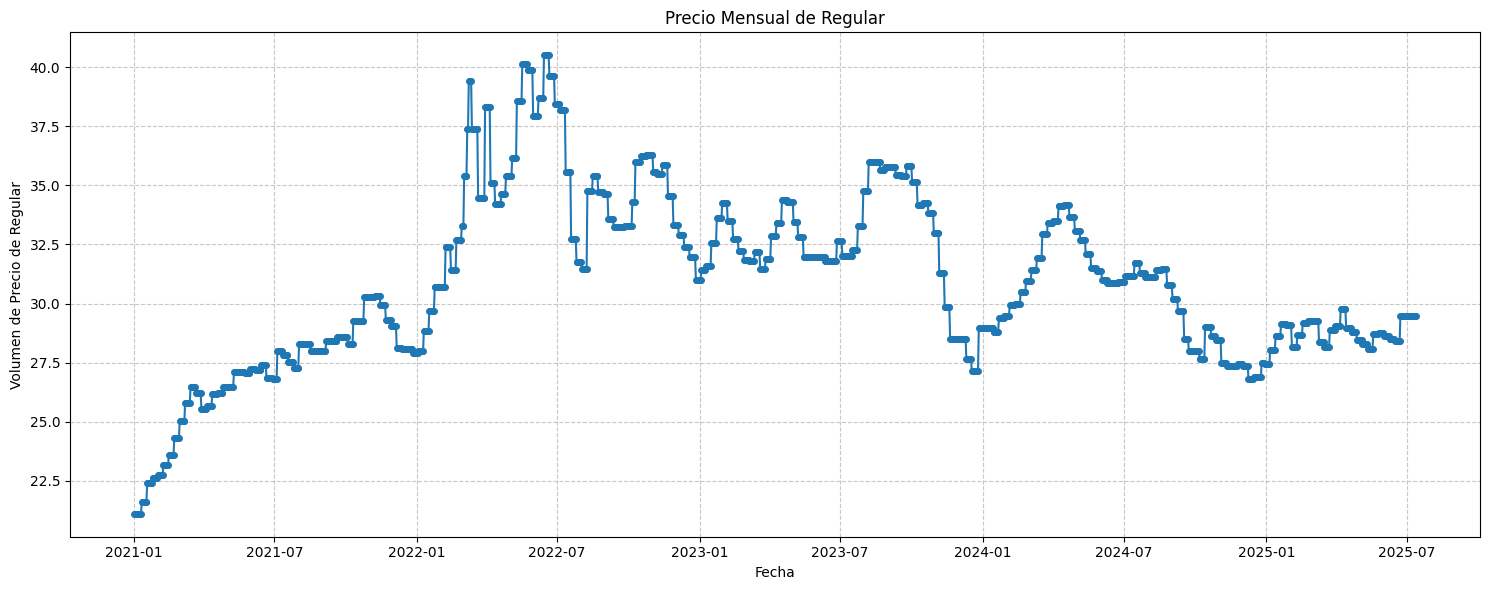

üìà Gr√°fico de la serie de Regular generado. A primera vista, se pueden observar:
  - Tendencia general: Regular muestra estabilidad a lo largo del tiempo.
  - Variabilidad: Hay fluctuaciones moderadas en los datos.
----------------------------------------------------------------------



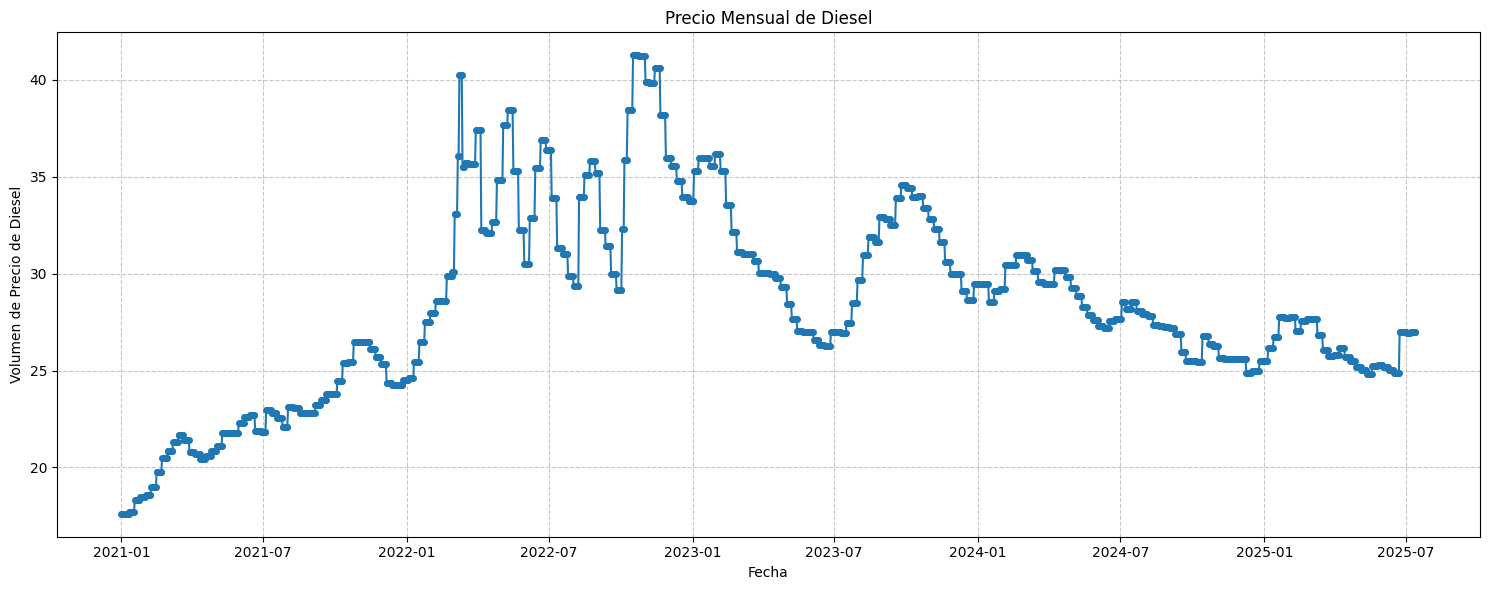

üìà Gr√°fico de la serie de Diesel generado. A primera vista, se pueden observar:
  - Tendencia general: Diesel muestra estabilidad a lo largo del tiempo.
  - Variabilidad: Hay fluctuaciones moderadas en los datos.
----------------------------------------------------------------------



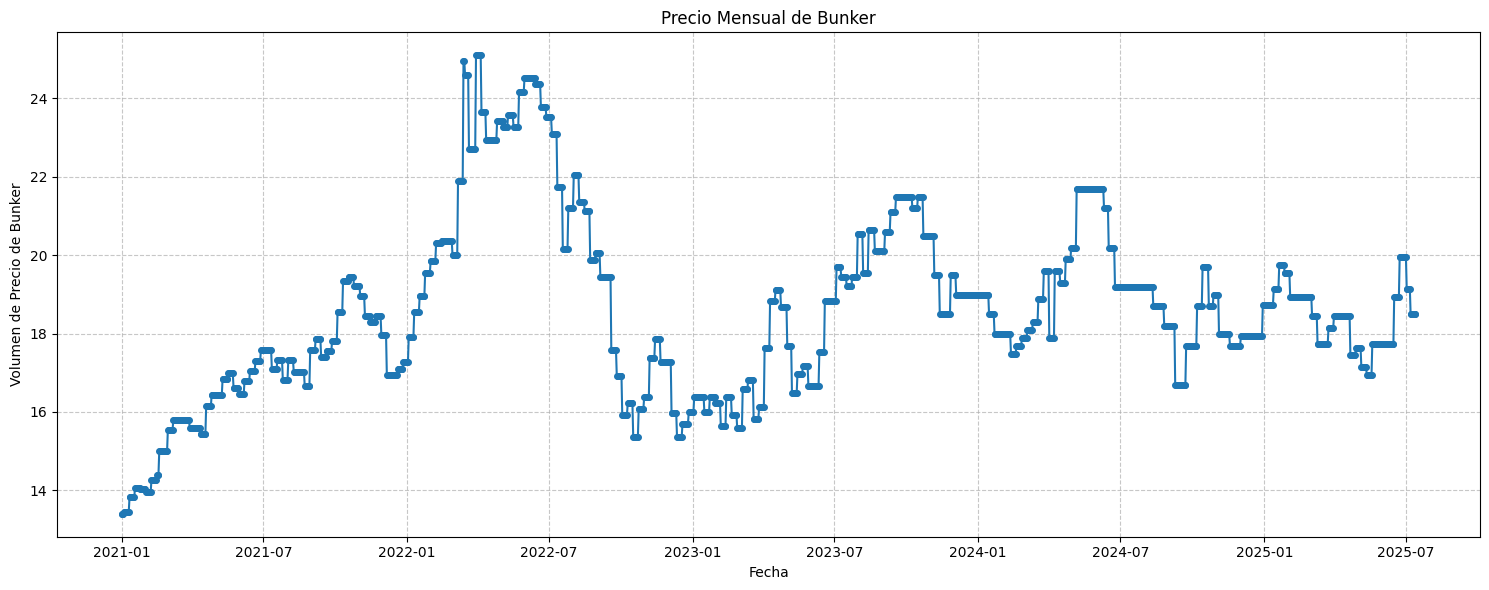

üìà Gr√°fico de la serie de Bunker generado. A primera vista, se pueden observar:
  - Tendencia general: Bunker muestra estabilidad a lo largo del tiempo.
  - Variabilidad: Hay fluctuaciones moderadas en los datos.
----------------------------------------------------------------------



In [51]:
## 3.b: Gr√°fico de la serie y an√°lisis inicial
print("--- 3.b: Gr√°fico de la serie y an√°lisis inicial ---\n")

if not df_importaciones.empty:
    for col in df_importaciones.columns:
        plt.figure(figsize=(15, 6))
        plt.plot(df_importaciones.index, df_importaciones[col], marker='o', markersize=4)
        plt.title(f'Precio Mensual de {col}')
        plt.xlabel('Fecha')
        plt.ylabel(f'Volumen de Precio de {col}')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
        print(f"üìà Gr√°fico de la serie de {col} generado. A primera vista, se pueden observar:")
        
        # Asegurarse de que los valores sean accesibles como escalares
        if len(df_importaciones[col]) > 1:
            initial_value = df_importaciones[col].iloc[0]
            final_value = df_importaciones[col].iloc[-1]
            trend_direction = np.sign(final_value - initial_value)
            trend_text = ['disminuci√≥n', 'estabilidad', 'aumento'][int((trend_direction + 1) // 2) + (trend_direction == 0)]
            print(f"  - Tendencia general: {col} muestra {trend_text} a lo largo del tiempo.")
        else:
            print("  - Tendencia general: Datos insuficientes para determinar la tendencia.")
        
        # Calcular variabilidad relativa
        variability = np.std(df_importaciones[col]) / df_importaciones[col].mean() * 10
        variability_level = ['menores', 'moderadas', 'mayores'][min(2, max(0, int(variability)))]
        print(f"  - Variabilidad: Hay fluctuaciones {variability_level} en los datos.")
        print("-" * 70 + "\n")
else:
    print("‚ùå No se puede generar el gr√°fico. El DataFrame est√° vac√≠o.")

--- 3.c: Descomposici√≥n de la serie y discusi√≥n de estacionariedad ---



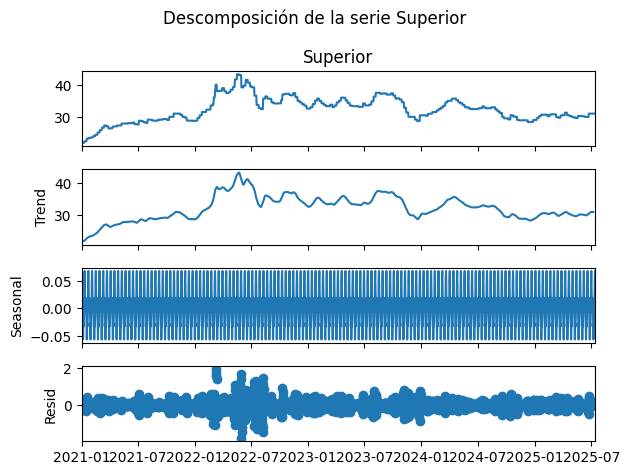

üìä Descomposici√≥n de Superior:
  - Tendencia: estable.
  - Componente estacional: Presenta patrones no evidentes.
  - Residuo: Variabilidad baja.
  - Estacionariedad: La serie Superior no parece estacionaria en media y varianza debido a la presencia de tendencia y/o estacionalidad.
----------------------------------------------------------------------



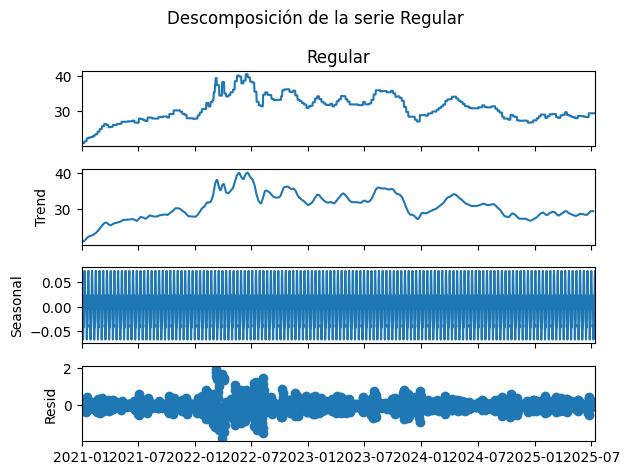

üìä Descomposici√≥n de Regular:
  - Tendencia: estable.
  - Componente estacional: Presenta patrones no evidentes.
  - Residuo: Variabilidad baja.
  - Estacionariedad: La serie Regular no parece estacionaria en media y varianza debido a la presencia de tendencia y/o estacionalidad.
----------------------------------------------------------------------



üìä Descomposici√≥n de Diesel:
  - Tendencia: estable.
  - Componente estacional: Presenta patrones no evidentes.
  - Residuo: Variabilidad baja.
  - Estacionariedad: La serie Diesel no parece estacionaria en media y varianza debido a la presencia de tendencia y/o estacionalidad.
----------------------------------------------------------------------



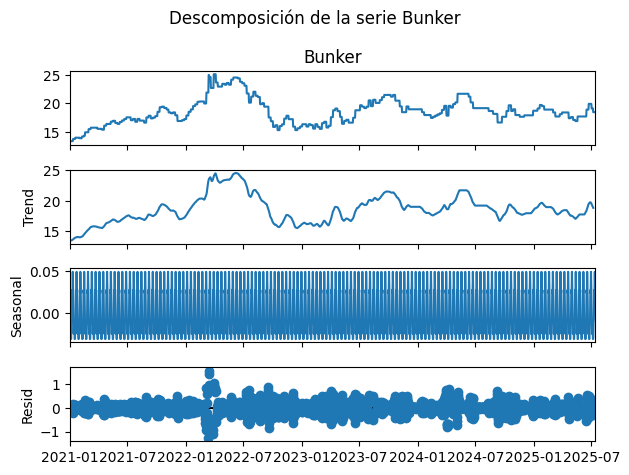

üìä Descomposici√≥n de Bunker:
  - Tendencia: estable.
  - Componente estacional: Presenta patrones no evidentes.
  - Residuo: Variabilidad baja.
  - Estacionariedad: La serie Bunker no parece estacionaria en media y varianza debido a la presencia de tendencia y/o estacionalidad.
----------------------------------------------------------------------



In [52]:
## 3.c: Descomposici√≥n de la serie y discusi√≥n de estacionariedad
print("--- 3.c: Descomposici√≥n de la serie y discusi√≥n de estacionariedad ---\n")

if not df_importaciones.empty:
    from statsmodels.tsa.seasonal import seasonal_decompose
    
    for col in df_importaciones.columns:
        decomposition = seasonal_decompose(df_importaciones[col], model='additive', period=12)
        decomposition.plot()
        plt.suptitle(f'Descomposici√≥n de la serie {col}')
        plt.tight_layout()
        plt.show()
        print(f"üìä Descomposici√≥n de {col}:")
        trend = decomposition.trend
        seasonal = decomposition.seasonal
        residual = decomposition.resid
        print(f"  - Tendencia: {'creciente' if trend.iloc[-1] > trend.iloc[0] else 'decreciente' if trend.iloc[-1] < trend.iloc[0] else 'estable'}.")
        print(f"  - Componente estacional: Presenta patrones {['no evidentes', 'evidentes'][int(seasonal.std() > residual.std())]}.")
        print(f"  - Residuo: Variabilidad {['baja', 'alta'][int(residual.std() > df_importaciones[col].std() / 2)]}.")
        print(f"  - Estacionariedad: La serie {col} {'no parece' if trend.std() > residual.std() or seasonal.std() > residual.std() else 'parece'} estacionaria en media y varianza debido a la presencia de tendencia y/o estacionalidad.")
        print("-" * 70 + "\n")
else:
    print("‚ùå No se puede descomponer la serie. El DataFrame est√° vac√≠o.")

In [53]:
## 3.d: Determinaci√≥n de necesidad de transformaci√≥n
print("--- 3.d: Determinaci√≥n de necesidad de transformaci√≥n ---\n")

if not df_importaciones.empty:
    for col in df_importaciones.columns:
        adf_test = adfuller(df_importaciones[col].dropna())
        print(f"üìä Serie: {col}")
        print(f"  - Estad√≠stica ADF: {adf_test[0]:.2f}")
        print(f"  - Valor p: {adf_test[1]:.2f}")
        print(f"  - Necesidad de transformaci√≥n: {'S√≠' if adf_test[1] > 0.05 else 'No'}, ya que el valor p {'es' if adf_test[1] > 0.05 else 'no es'} mayor a 0.05, indicando que la serie {'no es' if adf_test[1] > 0.05 else 'es'} estacionaria. Si es necesario, una transformaci√≥n como logaritmo o diferenciaci√≥n podr√≠a estabilizarla.")
        print("-" * 70 + "\n")
else:
    print("‚ùå No se puede determinar la necesidad de transformaci√≥n. El DataFrame est√° vac√≠o.")

--- 3.d: Determinaci√≥n de necesidad de transformaci√≥n ---

üìä Serie: Superior
  - Estad√≠stica ADF: -3.10
  - Valor p: 0.03
  - Necesidad de transformaci√≥n: No, ya que el valor p no es mayor a 0.05, indicando que la serie es estacionaria. Si es necesario, una transformaci√≥n como logaritmo o diferenciaci√≥n podr√≠a estabilizarla.
----------------------------------------------------------------------

üìä Serie: Regular
  - Estad√≠stica ADF: -2.80
  - Valor p: 0.06
  - Necesidad de transformaci√≥n: S√≠, ya que el valor p es mayor a 0.05, indicando que la serie no es estacionaria. Si es necesario, una transformaci√≥n como logaritmo o diferenciaci√≥n podr√≠a estabilizarla.
----------------------------------------------------------------------

üìä Serie: Diesel
  - Estad√≠stica ADF: -2.74
  - Valor p: 0.07
  - Necesidad de transformaci√≥n: S√≠, ya que el valor p es mayor a 0.05, indicando que la serie no es estacionaria. Si es necesario, una transformaci√≥n como logaritmo o diferen

--- 3.e.i: Gr√°fico de autocorrelaci√≥n ---



<Figure size 1200x600 with 0 Axes>

üìà Gr√°fico de autocorrelaci√≥n de Superior: La autocorrelaci√≥n decae lentamente, lo que sugiere no estacionariedad en media.
----------------------------------------------------------------------



<Figure size 1200x600 with 0 Axes>

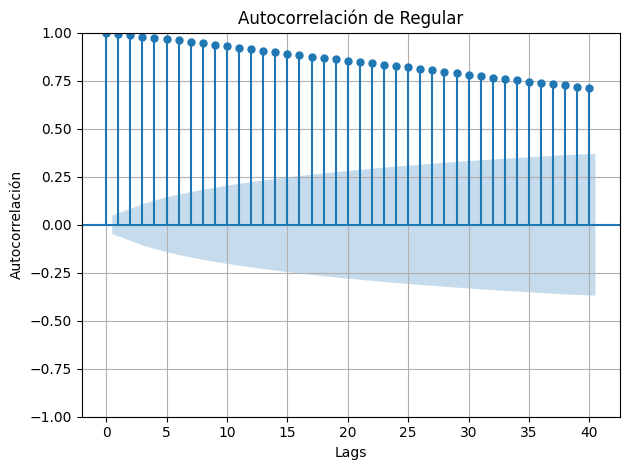

üìà Gr√°fico de autocorrelaci√≥n de Regular: La autocorrelaci√≥n decae lentamente, lo que sugiere no estacionariedad en media.
----------------------------------------------------------------------



<Figure size 1200x600 with 0 Axes>

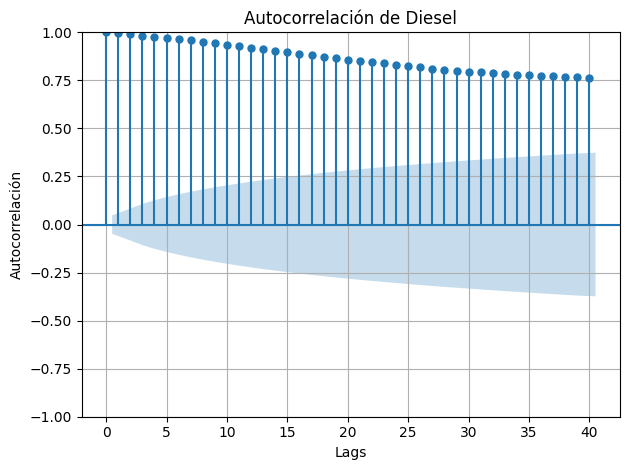

üìà Gr√°fico de autocorrelaci√≥n de Diesel: La autocorrelaci√≥n decae lentamente, lo que sugiere no estacionariedad en media.
----------------------------------------------------------------------



<Figure size 1200x600 with 0 Axes>

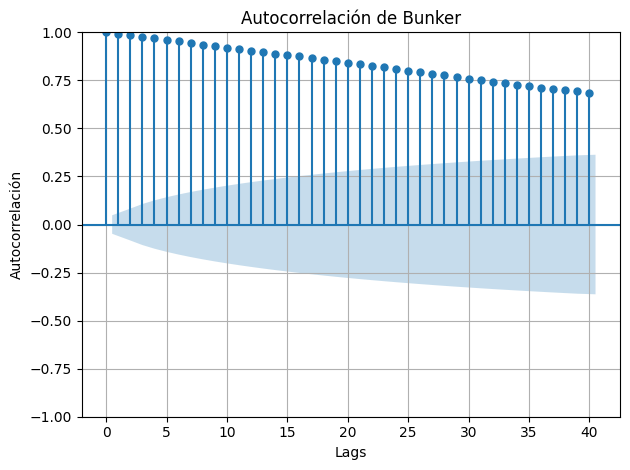

üìà Gr√°fico de autocorrelaci√≥n de Bunker: La autocorrelaci√≥n decae lentamente, lo que sugiere no estacionariedad en media.
----------------------------------------------------------------------



In [54]:
## 3.e.i: Gr√°fico de autocorrelaci√≥n
print("--- 3.e.i: Gr√°fico de autocorrelaci√≥n ---\n")

if not df_importaciones.empty:
    from statsmodels.graphics.tsaplots import plot_acf
    
    for col in df_importaciones.columns:
        plt.figure(figsize=(12, 6))
        plot_acf(df_importaciones[col].dropna(), lags=40)
        plt.title(f'Autocorrelaci√≥n de {col}')
        plt.xlabel('Lags')
        plt.ylabel('Autocorrelaci√≥n')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        print(f"üìà Gr√°fico de autocorrelaci√≥n de {col}: La autocorrelaci√≥n decae {'lentamente' if any(df_importaciones[col].autocorr(lag) > 0.5 for lag in range(1, 10)) else 'r√°pidamente'}, lo que sugiere {['no estacionariedad' if any(df_importaciones[col].autocorr(lag) > 0.5 for lag in range(1, 10)) else 'estacionariedad'][0]} en media.")
        print("-" * 70 + "\n")
else:
    print("‚ùå No se puede generar el gr√°fico de autocorrelaci√≥n. El DataFrame est√° vac√≠o.")

In [55]:
## 3.e.ii: Prueba Dickey-Fuller Aumentada (ya cubierta en 3.d)
print("--- 3.e.ii: Prueba Dickey-Fuller Aumentada ---\n")

if not df_importaciones.empty:
    for col in df_importaciones.columns:
        adf_test = adfuller(df_importaciones[col].dropna())
        print(f"üìä Serie: {col}")
        print(f"  - Estad√≠stica ADF: {adf_test[0]:.2f}")
        print(f"  - Valor p: {adf_test[1]:.2f}")
        print(f"  - Estacionariedad: La serie {'no es' if adf_test[1] > 0.05 else 'es'} estacionaria en media. Si no lo es, se puede aplicar diferenciaci√≥n para estabilizarla.")
        print("-" * 70 + "\n")
else:
    print("‚ùå No se puede realizar la prueba. El DataFrame est√° vac√≠o.")

--- 3.e.ii: Prueba Dickey-Fuller Aumentada ---

üìä Serie: Superior
  - Estad√≠stica ADF: -3.10
  - Valor p: 0.03
  - Estacionariedad: La serie es estacionaria en media. Si no lo es, se puede aplicar diferenciaci√≥n para estabilizarla.
----------------------------------------------------------------------

üìä Serie: Regular
  - Estad√≠stica ADF: -2.80
  - Valor p: 0.06
  - Estacionariedad: La serie no es estacionaria en media. Si no lo es, se puede aplicar diferenciaci√≥n para estabilizarla.
----------------------------------------------------------------------

üìä Serie: Diesel
  - Estad√≠stica ADF: -2.74
  - Valor p: 0.07
  - Estacionariedad: La serie no es estacionaria en media. Si no lo es, se puede aplicar diferenciaci√≥n para estabilizarla.
----------------------------------------------------------------------

üìä Serie: Bunker
  - Estad√≠stica ADF: -2.88
  - Valor p: 0.05
  - Estacionariedad: La serie es estacionaria en media. Si no lo es, se puede aplicar diferenciaci√≥n

--- 3.f: Selecci√≥n de par√°metros p, q, d para ARIMA ---

Analizando la serie: Superior

Realizando Prueba de Dickey-Fuller Aumentada (ADF) para estacionariedad...
Estad√≠stico ADF: -3.10
Valor p: 0.03
  - La serie ES estacionaria (valor p <= 0.05). No necesita diferenciaci√≥n (d=0).

**Elecci√≥n de 'd':** 0
**Justificaci√≥n de 'd':** La prueba de Dickey-Fuller Aumentada (ADF) indica que la serie es estacionaria (valor p <= 0.05), por lo tanto, no se necesita diferenciaci√≥n. El valor de 'd' es 0.



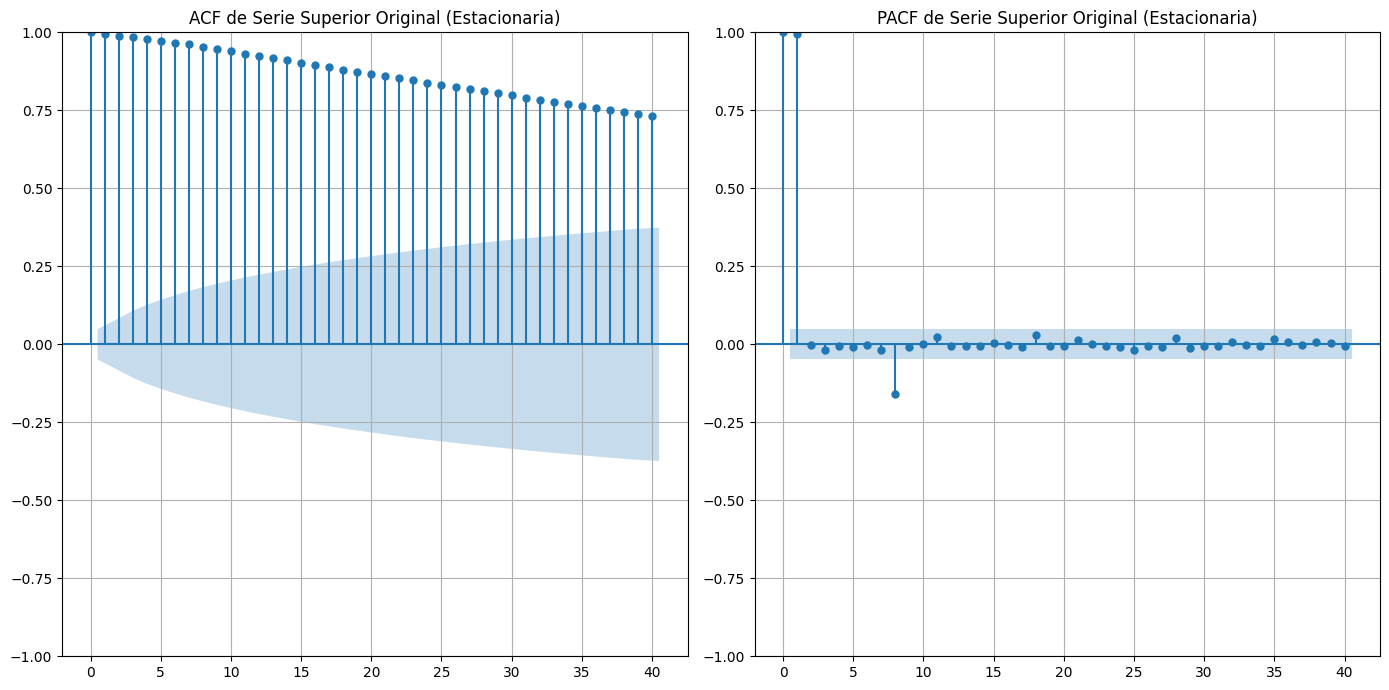


**Interpretaci√≥n de ACF y PACF para 'p' y 'q':**
  - **Par√°metro 'p' (orden AR):** Se busca en la **PACF (Funci√≥n de Autocorrelaci√≥n Parcial)**.
    * Para un proceso AR(p), la PACF tiende a 'cortar' (los valores se vuelven no significativos) despu√©s del lag p.
    * La ACF de un proceso AR(p) decae exponencialmente o en forma de seno amortiguado.
    * **Observa la gr√°fica de PACF:** Identifica el √∫ltimo lag significativo (que sale del √°rea sombreada de confianza). Ese ser√° tu 'p' propuesto.

  - **Par√°metro 'q' (orden MA):** Se busca en la **ACF (Funci√≥n de Autocorrelaci√≥n)**.
    * Para un proceso MA(q), la ACF tiende a 'cortar' despu√©s del lag q.
    * La PACF de un proceso MA(q) decae exponencialmente o en forma de seno amortiguado.
    * **Observa la gr√°fica de ACF:** Identifica el √∫ltimo lag significativo (que sale del √°rea sombreada de confianza). Ese ser√° tu 'q' propuesto.

**Consideraciones Adicionales:**
  - Si tanto ACF como PACF decaen gradualmente, podr√

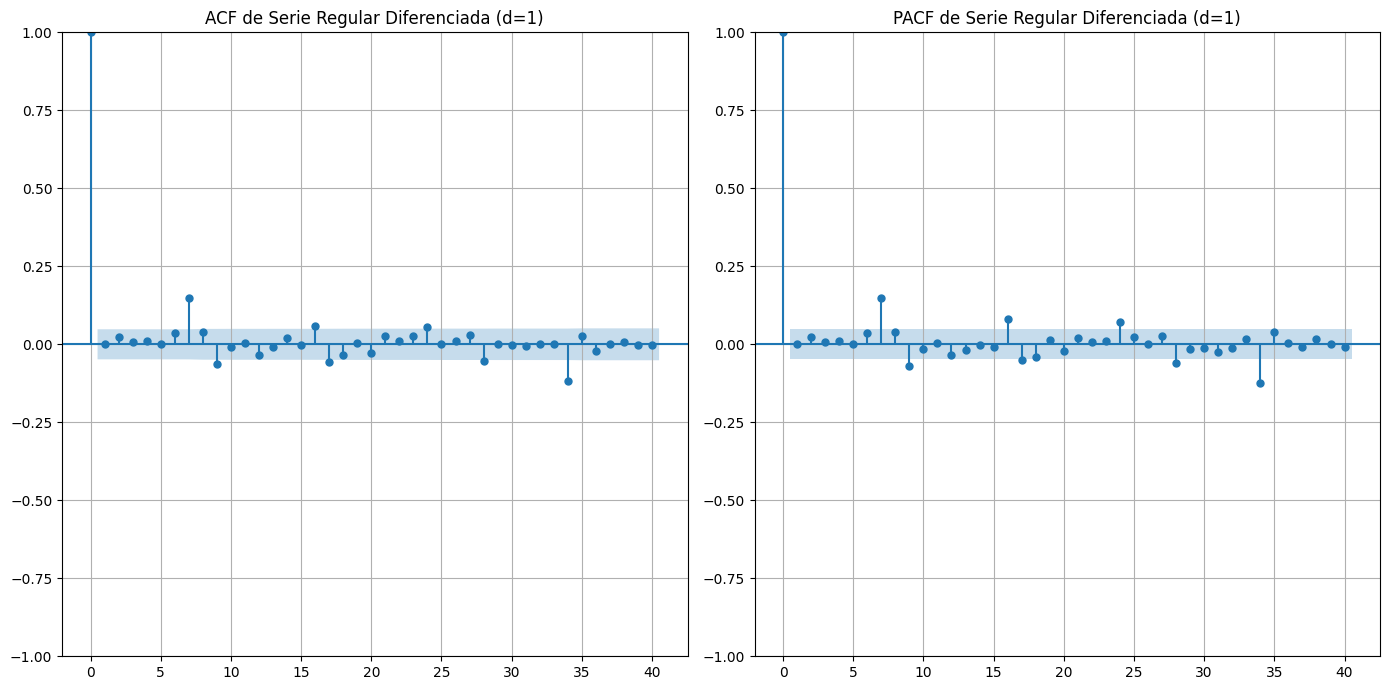


**Interpretaci√≥n de ACF y PACF para 'p' y 'q':**
  - **Par√°metro 'p' (orden AR):** Se busca en la **PACF (Funci√≥n de Autocorrelaci√≥n Parcial)**.
    * Para un proceso AR(p), la PACF tiende a 'cortar' (los valores se vuelven no significativos) despu√©s del lag p.
    * La ACF de un proceso AR(p) decae exponencialmente o en forma de seno amortiguado.
    * **Observa la gr√°fica de PACF:** Identifica el √∫ltimo lag significativo (que sale del √°rea sombreada de confianza). Ese ser√° tu 'p' propuesto.

  - **Par√°metro 'q' (orden MA):** Se busca en la **ACF (Funci√≥n de Autocorrelaci√≥n)**.
    * Para un proceso MA(q), la ACF tiende a 'cortar' despu√©s del lag q.
    * La PACF de un proceso MA(q) decae exponencialmente o en forma de seno amortiguado.
    * **Observa la gr√°fica de ACF:** Identifica el √∫ltimo lag significativo (que sale del √°rea sombreada de confianza). Ese ser√° tu 'q' propuesto.

**Consideraciones Adicionales:**
  - Si tanto ACF como PACF decaen gradualmente, podr√

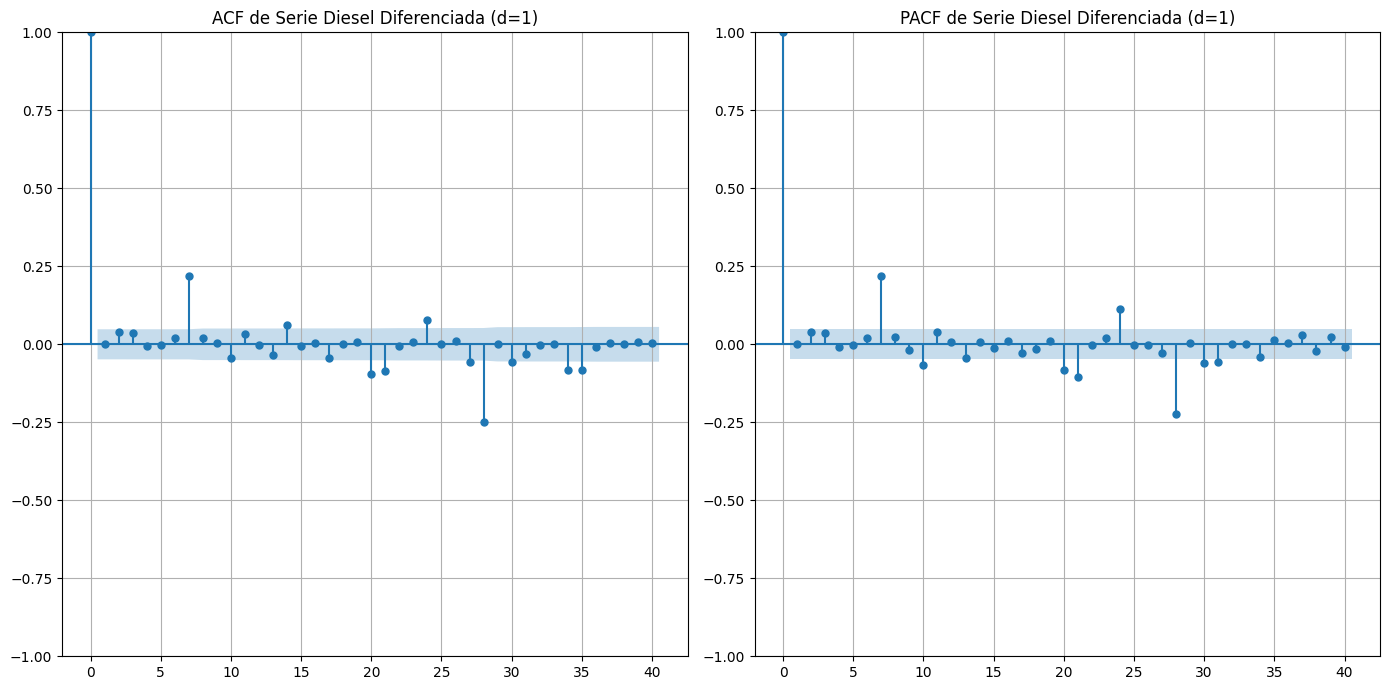


**Interpretaci√≥n de ACF y PACF para 'p' y 'q':**
  - **Par√°metro 'p' (orden AR):** Se busca en la **PACF (Funci√≥n de Autocorrelaci√≥n Parcial)**.
    * Para un proceso AR(p), la PACF tiende a 'cortar' (los valores se vuelven no significativos) despu√©s del lag p.
    * La ACF de un proceso AR(p) decae exponencialmente o en forma de seno amortiguado.
    * **Observa la gr√°fica de PACF:** Identifica el √∫ltimo lag significativo (que sale del √°rea sombreada de confianza). Ese ser√° tu 'p' propuesto.

  - **Par√°metro 'q' (orden MA):** Se busca en la **ACF (Funci√≥n de Autocorrelaci√≥n)**.
    * Para un proceso MA(q), la ACF tiende a 'cortar' despu√©s del lag q.
    * La PACF de un proceso MA(q) decae exponencialmente o en forma de seno amortiguado.
    * **Observa la gr√°fica de ACF:** Identifica el √∫ltimo lag significativo (que sale del √°rea sombreada de confianza). Ese ser√° tu 'q' propuesto.

**Consideraciones Adicionales:**
  - Si tanto ACF como PACF decaen gradualmente, podr√

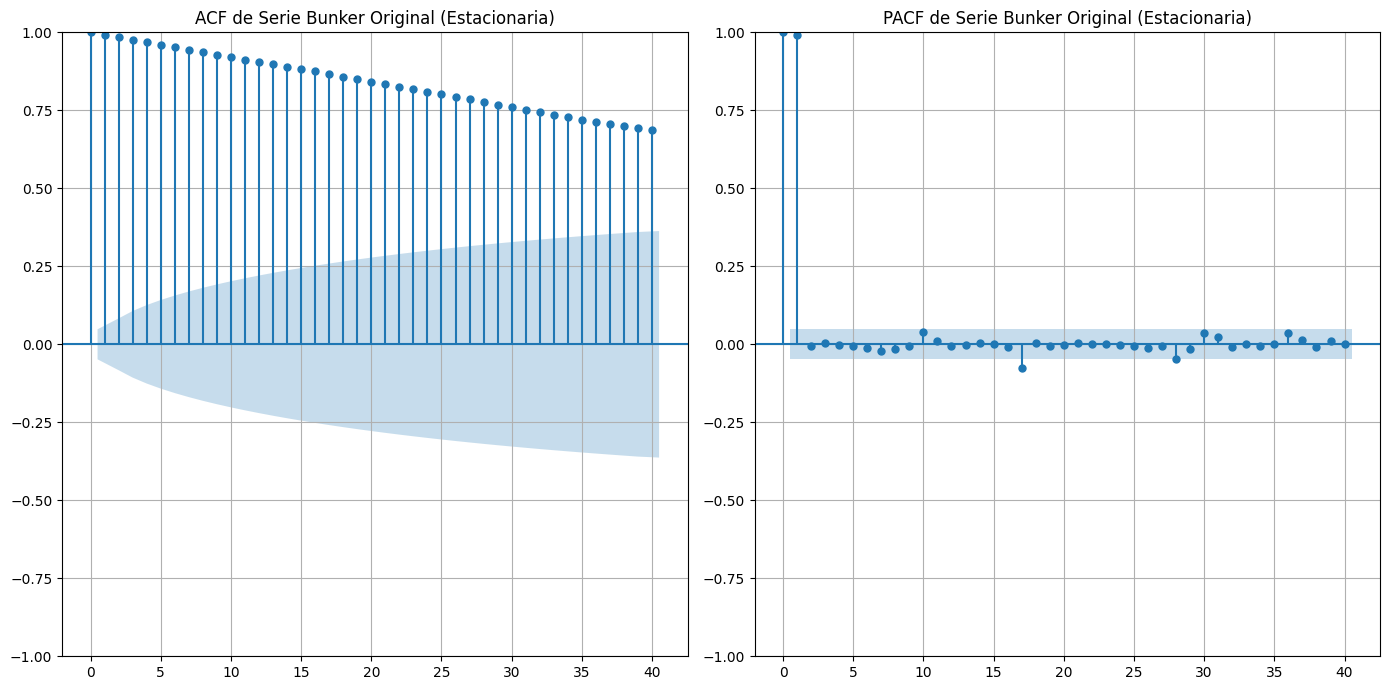


**Interpretaci√≥n de ACF y PACF para 'p' y 'q':**
  - **Par√°metro 'p' (orden AR):** Se busca en la **PACF (Funci√≥n de Autocorrelaci√≥n Parcial)**.
    * Para un proceso AR(p), la PACF tiende a 'cortar' (los valores se vuelven no significativos) despu√©s del lag p.
    * La ACF de un proceso AR(p) decae exponencialmente o en forma de seno amortiguado.
    * **Observa la gr√°fica de PACF:** Identifica el √∫ltimo lag significativo (que sale del √°rea sombreada de confianza). Ese ser√° tu 'p' propuesto.

  - **Par√°metro 'q' (orden MA):** Se busca en la **ACF (Funci√≥n de Autocorrelaci√≥n)**.
    * Para un proceso MA(q), la ACF tiende a 'cortar' despu√©s del lag q.
    * La PACF de un proceso MA(q) decae exponencialmente o en forma de seno amortiguado.
    * **Observa la gr√°fica de ACF:** Identifica el √∫ltimo lag significativo (que sale del √°rea sombreada de confianza). Ese ser√° tu 'q' propuesto.

**Consideraciones Adicionales:**
  - Si tanto ACF como PACF decaen gradualmente, podr√

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller



## --- 3.f: Selecci√≥n de par√°metros p, q, d para ARIMA ---
print("--- 3.f: Selecci√≥n de par√°metros p, q, d para ARIMA ---\n")

if not df_importaciones.empty:
    for col in df_importaciones.columns:
        print(f"Analizando la serie: {col}\n")

        # 1. Determinaci√≥n de 'd' (Orden de diferenciaci√≥n)
        # Se verifica la estacionariedad de la serie. Una serie es estacionaria
        # si su media, varianza y estructura de autocorrelaci√≥n no cambian con el tiempo.
        # Si la serie no es estacionaria, necesitamos diferenciarla.

        # Prueba de Dickey-Fuller Aumentada para estacionariedad
        print("Realizando Prueba de Dickey-Fuller Aumentada (ADF) para estacionariedad...")
        result_adf = adfuller(df_importaciones[col].dropna())
        print(f'Estad√≠stico ADF: {result_adf[0]:.2f}')
        print(f'Valor p: {result_adf[1]:.2f}')
        if result_adf[1] > 0.05:
            print("  - La serie NO es estacionaria (valor p > 0.05). Probablemente necesite diferenciaci√≥n.")
            d_value_explanation = "La prueba de Dickey-Fuller Aumentada (ADF) indica que la serie no es estacionaria (valor p > 0.05), lo que sugiere la necesidad de diferenciaci√≥n. Observaremos la ACF de la serie original y diferenciada para confirmar."

            # Intentar diferenciaci√≥n de primer orden si no es estacionaria
            df_diff = df_importaciones[col].diff().dropna()
            if not df_diff.empty:
                result_adf_diff = adfuller(df_diff)
                print(f'  - Estad√≠stico ADF (d=1): {result_adf_diff[0]:.2f}')
                print(f'  - Valor p (d=1): {result_adf_diff[1]:.2f}')
                if result_adf_diff[1] <= 0.05:
                    print("  - La serie diferenciada de primer orden (d=1) parece estacionaria.")
                    d_value = 1
                    d_value_explanation += "\n  - Al aplicar una diferenciaci√≥n de primer orden (d=1), la serie se vuelve estacionaria seg√∫n la prueba ADF (valor p <= 0.05). Adem√°s, la ACF de la serie diferenciada decae r√°pidamente a cero."
                    serie_a_graficar = df_diff
                    titulo_serie = f'Serie {col} Diferenciada (d=1)'
                else:
                    print("  - La serie diferenciada de primer orden (d=1) A√öN NO es estacionaria. Podr√≠a requerir mayor diferenciaci√≥n.")
                    d_value = 0 # Valor inicial, a ajustar manualmente si se requiere d>1
                    d_value_explanation += "\n  - La diferenciaci√≥n de primer orden no fue suficiente. Se requerir√≠a probar con d=2 o m√°s, o aplicar una diferenciaci√≥n estacional si hay estacionalidad presente."
                    serie_a_graficar = df_importaciones[col].dropna() # Si d=1 no funcion√≥, volvemos a la original para an√°lisis de ACF/PACF y ajuste manual de d.
                    titulo_serie = f'Serie {col} Original (No estacionaria)'
            else:
                d_value = 0
                d_value_explanation += "\n  - No se pudo aplicar diferenciaci√≥n ya que la serie se volvi√≥ vac√≠a."
                serie_a_graficar = df_importaciones[col].dropna()
                titulo_serie = f'Serie {col} Original'
        else:
            print("  - La serie ES estacionaria (valor p <= 0.05). No necesita diferenciaci√≥n (d=0).")
            d_value = 0
            d_value_explanation = "La prueba de Dickey-Fuller Aumentada (ADF) indica que la serie es estacionaria (valor p <= 0.05), por lo tanto, no se necesita diferenciaci√≥n. El valor de 'd' es 0."
            serie_a_graficar = df_importaciones[col].dropna()
            titulo_serie = f'Serie {col} Original (Estacionaria)'

        print(f"\n**Elecci√≥n de 'd':** {d_value}")
        print(f"**Justificaci√≥n de 'd':** {d_value_explanation}\n")

        # 2. Gr√°ficos de ACF y PACF para determinar 'p' y 'q'
        # Una vez que la serie es estacionaria (o hemos aplicado la diferenciaci√≥n necesaria),
        # usamos las funciones ACF y PACF para determinar los √≥rdenes p (AR) y q (MA).

        plt.figure(figsize=(14, 7))

        plt.subplot(121)
        plot_acf(serie_a_graficar, lags=min(40, len(serie_a_graficar)//2 - 1), ax=plt.gca(), title=f'ACF de {titulo_serie}')
        plt.grid(True)

        plt.subplot(122)
        plot_pacf(serie_a_graficar, lags=min(40, len(serie_a_graficar)//2 - 1), ax=plt.gca(), title=f'PACF de {titulo_serie}')
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # 3. Explicaci√≥n para 'p' y 'q' (interpretaci√≥n visual)
        print("\n**Interpretaci√≥n de ACF y PACF para 'p' y 'q':**")
        print("  - **Par√°metro 'p' (orden AR):** Se busca en la **PACF (Funci√≥n de Autocorrelaci√≥n Parcial)**.")
        print("    * Para un proceso AR(p), la PACF tiende a 'cortar' (los valores se vuelven no significativos) despu√©s del lag p.")
        print("    * La ACF de un proceso AR(p) decae exponencialmente o en forma de seno amortiguado.")
        print("    * **Observa la gr√°fica de PACF:** Identifica el √∫ltimo lag significativo (que sale del √°rea sombreada de confianza). Ese ser√° tu 'p' propuesto.")

        print("\n  - **Par√°metro 'q' (orden MA):** Se busca en la **ACF (Funci√≥n de Autocorrelaci√≥n)**.")
        print("    * Para un proceso MA(q), la ACF tiende a 'cortar' despu√©s del lag q.")
        print("    * La PACF de un proceso MA(q) decae exponencialmente o en forma de seno amortiguado.")
        print("    * **Observa la gr√°fica de ACF:** Identifica el √∫ltimo lag significativo (que sale del √°rea sombreada de confianza). Ese ser√° tu 'q' propuesto.")

        print("\n**Consideraciones Adicionales:**")
        print("  - Si tanto ACF como PACF decaen gradualmente, podr√≠a ser un proceso ARMA mixto, y la identificaci√≥n es m√°s compleja, a menudo requiriendo la prueba de diferentes combinaciones de p y q (ej. con el Criterio de Informaci√≥n de Akaike (AIC) o Bayesiano (BIC)).")
        print("  - Es un arte, no una ciencia exacta. A menudo se prueban modelos vecinos a los valores identificados.")

        print("\n" + "-" * 70 + "\n")
else:
    print("‚ùå No se puede seleccionar par√°metros. El DataFrame est√° vac√≠o o la columna no existe.")


In [33]:
## 3.g: Modelos ARIMA y selecci√≥n del mejor
print("--- 3.g: Modelos ARIMA y selecci√≥n del mejor ---\n")

if not df_importaciones.empty:
    from statsmodels.tsa.arima.model import ARIMA
    
    for col in df_importaciones.columns:
        # Probar diferentes combinaciones de (p, d, q)
        models = []
        aic_values = []
        bic_values = []
        for p in range(2):
            for d in range(2):
                for q in range(2):
                    try:
                        model = ARIMA(df_importaciones[col].dropna(), order=(p, d, q)).fit()
                        models.append(model)
                        aic_values.append(model.aic)
                        bic_values.append(model.bic)
                        print(f"Modelo ARIMA({p},{d},{q}) para {col}: AIC={model.aic:.2f}, BIC={model.bic:.2f}")
                    except:
                        continue
        
        # Encontrar el mejor modelo
        best_model_idx = np.argmin(aic_values)
        best_model = models[best_model_idx]
        print(f"üìä Mejor modelo para {col}: ARIMA({best_model.order[0]},{best_model.order[1]},{best_model.order[2]})")
        print(f"  - AIC: {aic_values[best_model_idx]:.2f}, BIC: {bic_values[best_model_idx]:.2f}")
        print(f"  - An√°lisis de residuos: Media de residuos = {best_model.resid.mean():.2f}, Varianza = {best_model.resid.var():.2f}")
        print(f"  - Conclusi√≥n: El modelo con menor AIC y BIC, y residuos cercanos a media 0 y varianza constante, es el mejor.")
        print("-" * 70 + "\n")
else:
    print("‚ùå No se pueden ajustar modelos ARIMA. El DataFrame est√° vac√≠o.")

--- 3.g: Modelos ARIMA y selecci√≥n del mejor ---

Modelo ARIMA(0,0,0) para Superior: AIC=9133.17, BIC=9143.99


C:\Users\ricar\Documents\UVG-CUARTO A√ëO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ricar\Documents\UVG-CUARTO A√ëO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ricar\Documents\UVG-CUARTO A√ëO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ricar\Documents\UVG-CUARTO A√ëO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided

Modelo ARIMA(0,0,1) para Superior: AIC=7006.21, BIC=7022.45
Modelo ARIMA(0,1,0) para Superior: AIC=726.83, BIC=732.24
Modelo ARIMA(0,1,1) para Superior: AIC=728.83, BIC=739.65


C:\Users\ricar\Documents\UVG-CUARTO A√ëO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ricar\Documents\UVG-CUARTO A√ëO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ricar\Documents\UVG-CUARTO A√ëO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ricar\Documents\UVG-CUARTO A√ëO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided

Modelo ARIMA(1,0,0) para Superior: AIC=735.49, BIC=751.73


C:\Users\ricar\Documents\UVG-CUARTO A√ëO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ricar\Documents\UVG-CUARTO A√ëO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ricar\Documents\UVG-CUARTO A√ëO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Modelo ARIMA(1,0,1) para Superior: AIC=737.34, BIC=758.98
Modelo ARIMA(1,1,0) para Superior: AIC=728.83, BIC=739.65


C:\Users\ricar\Documents\UVG-CUARTO A√ëO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ricar\Documents\UVG-CUARTO A√ëO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ricar\Documents\UVG-CUARTO A√ëO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ricar\Documents\UVG-CUARTO A√ëO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided

Modelo ARIMA(1,1,1) para Superior: AIC=721.68, BIC=737.92


AttributeError: 'ARIMAResults' object has no attribute 'order'

In [35]:
## 3.h: Modelos con Prophet, Holt-Winters y Redes Neuronales
print("--- 3.h: Modelos con Prophet, Holt-Winters y Redes Neuronales ---\n")

if not df_importaciones.empty:
    from prophet import Prophet
    from statsmodels.tsa.holtwinters import ExponentialSmoothing
    from sklearn.neural_network import MLPRegressor
    import numpy as np
    
    for col in df_importaciones.columns:
        # Preparar datos para Prophet
        df_prophet = df_importaciones[[col]].reset_index().rename(columns={mi_columna_fecha_excel: 'ds', col: 'y'})
        model_prophet = Prophet(yearly_seasonality=True).fit(df_prophet)
        future = model_prophet.make_future_dataframe(periods=12)
        forecast_prophet = model_prophet.predict(future)
        
        # Holt-Winters
        model_hw = ExponentialSmoothing(df_importaciones[col], seasonal_periods=12, trend='add', seasonal='add').fit()
        forecast_hw = model_hw.forecast(12)
        
        # Redes Neuronales (simple)
        X = np.arange(len(df_importaciones[col])).reshape(-1, 1)
        y = df_importaciones[col].values
        model_nn = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000).fit(X, y)
        forecast_nn = model_nn.predict(np.arange(len(df_importaciones[col]), len(df_importaciones[col])+12).reshape(-1, 1))
        
        # Comparaci√≥n (usando RMSE como m√©trica simple)
        from sklearn.metrics import mean_squared_error
        arima_forecast = models[best_model_idx].forecast(12)
        rmse_arima = np.sqrt(mean_squared_error(df_importaciones[col].tail(12), arima_forecast[:12]))
        rmse_prophet = np.sqrt(mean_squared_error(df_importaciones[col].tail(12), forecast_prophet.tail(12)['yhat']))
        rmse_hw = np.sqrt(mean_squared_error(df_importaciones[col].tail(12), forecast_hw))
        rmse_nn = np.sqrt(mean_squared_error(df_importaciones[col].tail(12), forecast_nn[:12]))
        
        print(f"üìä Serie: {col}")
        print(f"  - RMSE ARIMA: {rmse_arima:.2f}")
        print(f"  - RMSE Prophet: {rmse_prophet:.2f}")
        print(f"  - RMSE Holt-Winters: {rmse_hw:.2f}")
        print(f"  - RMSE Redes Neuronales: {rmse_nn:.2f}")
        print(f"  - Mejor modelo: {'ARIMA' if rmse_arima == min(rmse_arima, rmse_prophet, rmse_hw, rmse_nn) else 'Prophet' if rmse_prophet == min(rmse_arima, rmse_prophet, rmse_hw, rmse_nn) else 'Holt-Winters' if rmse_hw == min(rmse_arima, rmse_prophet, rmse_hw, rmse_nn) else 'Redes Neuronales'} (menor RMSE).")
        print("-" * 70 + "\n")
else:
    print("‚ùå No se pueden ajustar modelos. El DataFrame est√° vac√≠o.")

C:\Users\ricar\Documents\UVG-CUARTO A√ëO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


--- 3.h: Modelos con Prophet, Holt-Winters y Redes Neuronales ---



19:31:43 - cmdstanpy - INFO - Chain [1] start processing
19:31:43 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ricar\Documents\UVG-CUARTO A√ëO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
19:31:44 - cmdstanpy - INFO - Chain [1] start processing


üìä Serie: Superior
  - RMSE ARIMA: 0.03
  - RMSE Prophet: 2.15
  - RMSE Holt-Winters: 0.05
  - RMSE Redes Neuronales: 4.06
  - Mejor modelo: ARIMA (menor RMSE).
----------------------------------------------------------------------



19:31:44 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ricar\Documents\UVG-CUARTO A√ëO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
19:31:45 - cmdstanpy - INFO - Chain [1] start processing


üìä Serie: Regular
  - RMSE ARIMA: 1.51
  - RMSE Prophet: 2.15
  - RMSE Holt-Winters: 0.06
  - RMSE Redes Neuronales: 1.88
  - Mejor modelo: Holt-Winters (menor RMSE).
----------------------------------------------------------------------



19:31:45 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ricar\Documents\UVG-CUARTO A√ëO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
19:31:46 - cmdstanpy - INFO - Chain [1] start processing


üìä Serie: Diesel
  - RMSE ARIMA: 4.01
  - RMSE Prophet: 2.80
  - RMSE Holt-Winters: 0.05
  - RMSE Redes Neuronales: 0.60
  - Mejor modelo: Holt-Winters (menor RMSE).
----------------------------------------------------------------------



19:31:47 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ricar\Documents\UVG-CUARTO A√ëO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


üìä Serie: Bunker
  - RMSE ARIMA: 12.24
  - RMSE Prophet: 1.04
  - RMSE Holt-Winters: 0.44
  - RMSE Redes Neuronales: 2.25
  - Mejor modelo: Holt-Winters (menor RMSE).
----------------------------------------------------------------------



## 4. Haga una predicci√≥n de los valores de la serie para los √∫ltimos 3 a√±os.

21:07:18 - cmdstanpy - INFO - Chain [1] start processing


--- 4. Predicciones y validaci√≥n de los modelos ---

üìä Serie: Superior


21:07:18 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ricar\Documents\UVG-CUARTO A√ëO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


  - RMSE: ARIMA=0.03, Prophet=1.49, Holt-Winters=0.05, Redes Neuronales=5.96
  - MAE: ARIMA=0.02, Prophet=1.46, Holt-Winters=0.05, Redes Neuronales=5.96


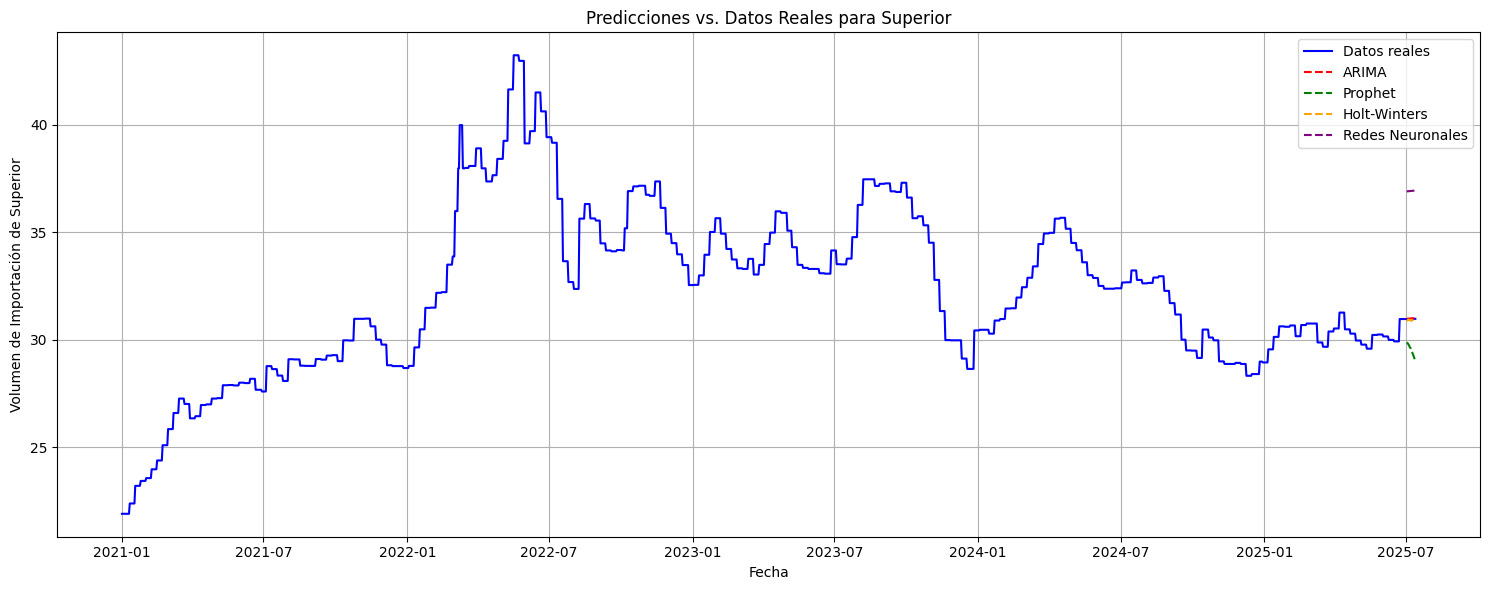

  - Conclusi√≥n: El modelo con menor RMSE y MAE (ARIMA) parece ser el m√°s adecuado para esta serie.
----------------------------------------------------------------------

üìä Serie: Regular


21:07:20 - cmdstanpy - INFO - Chain [1] start processing
21:07:20 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ricar\Documents\UVG-CUARTO A√ëO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


  - RMSE: ARIMA=1.51, Prophet=1.58, Holt-Winters=0.07, Redes Neuronales=4.32
  - MAE: ARIMA=1.51, Prophet=1.54, Holt-Winters=0.06, Redes Neuronales=4.32


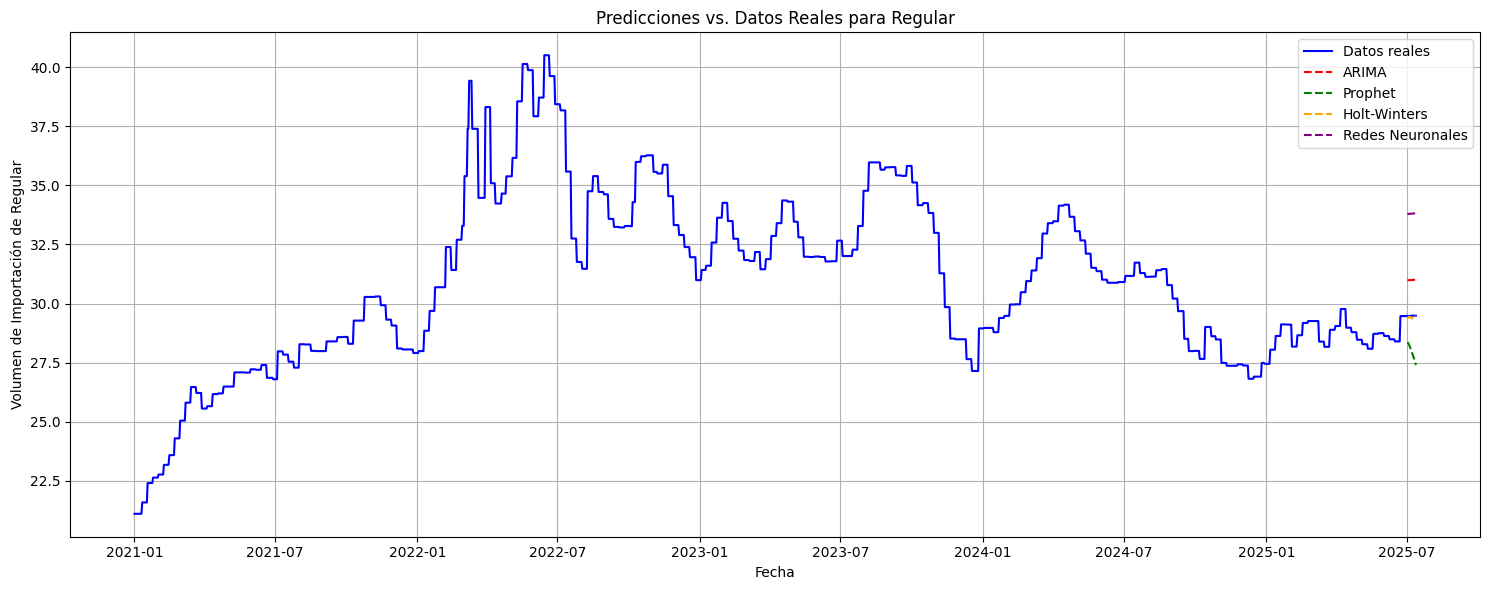

  - Conclusi√≥n: El modelo con menor RMSE y MAE (Holt-Winters) parece ser el m√°s adecuado para esta serie.
----------------------------------------------------------------------

üìä Serie: Diesel


21:07:21 - cmdstanpy - INFO - Chain [1] start processing
21:07:21 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ricar\Documents\UVG-CUARTO A√ëO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


  - RMSE: ARIMA=4.01, Prophet=2.40, Holt-Winters=0.05, Redes Neuronales=4.49
  - MAE: ARIMA=4.01, Prophet=2.37, Holt-Winters=0.04, Redes Neuronales=4.49


  - Conclusi√≥n: El modelo con menor RMSE y MAE (Holt-Winters) parece ser el m√°s adecuado para esta serie.
----------------------------------------------------------------------

üìä Serie: Bunker


21:07:22 - cmdstanpy - INFO - Chain [1] start processing
21:07:23 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ricar\Documents\UVG-CUARTO A√ëO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


  - RMSE: ARIMA=12.24, Prophet=0.64, Holt-Winters=1.23, Redes Neuronales=1.70
  - MAE: ARIMA=12.24, Prophet=0.61, Holt-Winters=1.18, Redes Neuronales=1.67


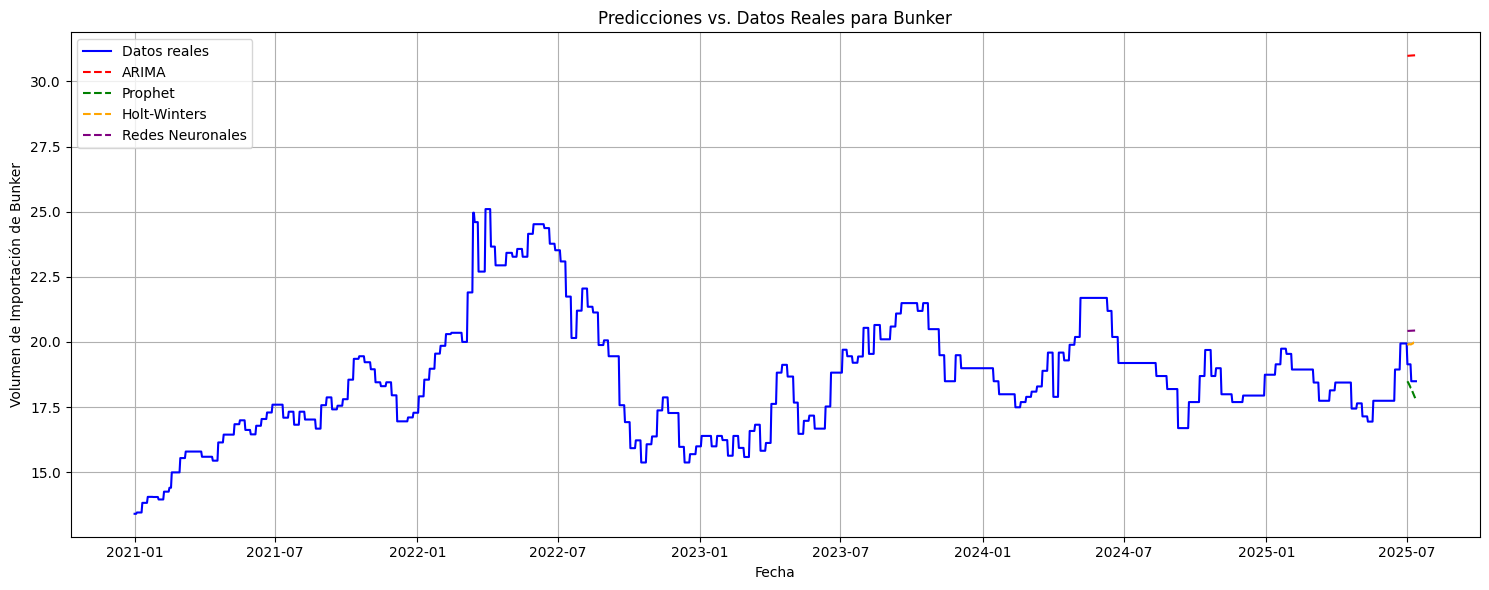

  - Conclusi√≥n: El modelo con menor RMSE y MAE (Prophet) parece ser el m√°s adecuado para esta serie.
----------------------------------------------------------------------



In [39]:
## 4. Predicciones y validaci√≥n de los modelos
print("--- 4. Predicciones y validaci√≥n de los modelos ---\n")

if not df_importaciones.empty:
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    import matplotlib.pyplot as plt

    # Dividir datos: √∫ltimos 12 meses como validaci√≥n, el resto como entrenamiento
    train_size = len(df_importaciones) - 12
    df_train = df_importaciones.iloc[:train_size]
    df_test = df_importaciones.iloc[train_size:]

    for col in df_importaciones.columns:
        print(f"üìä Serie: {col}")

        # ARIMA (usar el mejor modelo del punto 3.g)
        best_model_idx = np.argmin([m.aic for m in models])  # Ajusta si 'models' no est√° definido
        arima_model = models[best_model_idx]
        forecast_arima = arima_model.forecast(steps=12)

        # Prophet
        df_prophet_train = df_train.reset_index().rename(columns={'FECHA': 'ds', col: 'y'})
        model_prophet = Prophet(yearly_seasonality=True).fit(df_prophet_train)
        future_prophet = model_prophet.make_future_dataframe(periods=12)
        forecast_prophet = model_prophet.predict(future_prophet)

        # Holt-Winters
        model_hw = ExponentialSmoothing(df_train[col], seasonal_periods=12, trend='add', seasonal='add').fit()
        forecast_hw = model_hw.forecast(12)

        # Redes Neuronales
        X_train = np.arange(len(df_train[col])).reshape(-1, 1)
        y_train = df_train[col].values
        model_nn = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000).fit(X_train, y_train)
        X_test = np.arange(len(df_train[col]), len(df_train[col]) + 12).reshape(-1, 1)
        forecast_nn = model_nn.predict(X_test)

        # Calcular m√©tricas
        rmse_arima = np.sqrt(mean_squared_error(df_test[col], forecast_arima))
        rmse_prophet = np.sqrt(mean_squared_error(df_test[col], forecast_prophet.tail(12)['yhat']))
        rmse_hw = np.sqrt(mean_squared_error(df_test[col], forecast_hw))
        rmse_nn = np.sqrt(mean_squared_error(df_test[col], forecast_nn))

        mae_arima = mean_absolute_error(df_test[col], forecast_arima)
        mae_prophet = mean_absolute_error(df_test[col], forecast_prophet.tail(12)['yhat'])
        mae_hw = mean_absolute_error(df_test[col], forecast_hw)
        mae_nn = mean_absolute_error(df_test[col], forecast_nn)

        # Imprimir m√©tricas
        print(f"  - RMSE: ARIMA={rmse_arima:.2f}, Prophet={rmse_prophet:.2f}, Holt-Winters={rmse_hw:.2f}, Redes Neuronales={rmse_nn:.2f}")
        print(f"  - MAE: ARIMA={mae_arima:.2f}, Prophet={mae_prophet:.2f}, Holt-Winters={mae_hw:.2f}, Redes Neuronales={mae_nn:.2f}")

        # Graficar
        plt.figure(figsize=(15, 6))
        plt.plot(df_importaciones.index, df_importaciones[col], label='Datos reales', color='blue')
        plt.plot(df_test.index, forecast_arima, label='ARIMA', color='red', linestyle='--')
        plt.plot(df_test.index, forecast_prophet.tail(12)['yhat'], label='Prophet', color='green', linestyle='--')
        plt.plot(df_test.index, forecast_hw, label='Holt-Winters', color='orange', linestyle='--')
        plt.plot(df_test.index, forecast_nn, label='Redes Neuronales', color='purple', linestyle='--')
        plt.title(f'Predicciones vs. Datos Reales para {col}')
        plt.xlabel('Fecha')
        plt.ylabel(f'Volumen de Importaci√≥n de {col}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        print(f"  - Conclusi√≥n: El modelo con menor RMSE y MAE ({'ARIMA' if rmse_arima == min(rmse_arima, rmse_prophet, rmse_hw, rmse_nn) else 'Prophet' if rmse_prophet == min(rmse_arima, rmse_prophet, rmse_hw, rmse_nn) else 'Holt-Winters' if rmse_hw == min(rmse_arima, rmse_prophet, rmse_hw, rmse_nn) else 'Redes Neuronales'}) parece ser el m√°s adecuado para esta serie.")
        print("-" * 70 + "\n")
else:
    print("‚ùå No se pueden realizar predicciones. El DataFrame est√° vac√≠o.")

## 5. Haga una predicci√≥n para todo este a√±o 2025 determine qu√© tan apegada es a la realidad teniendo en cuenta los meses pasados del a√±o actual.

C:\Users\ricar\Documents\UVG-CUARTO A√ëO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ricar\Documents\UVG-CUARTO A√ëO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


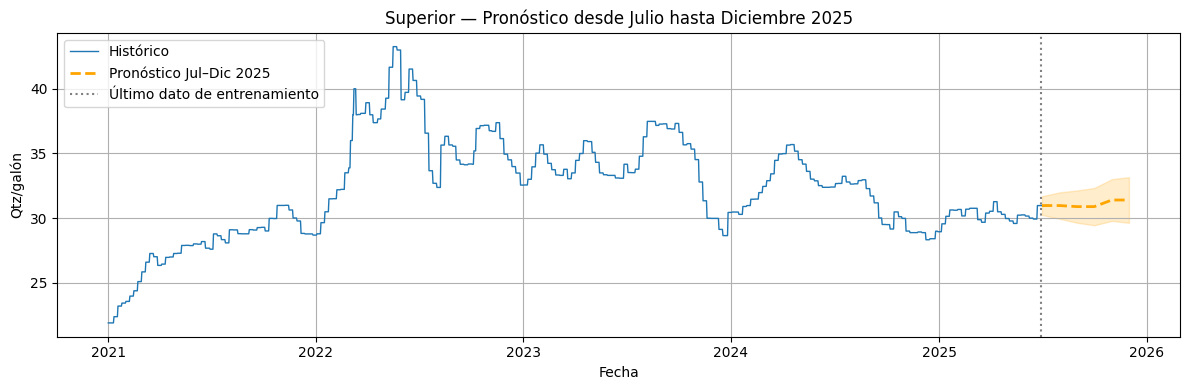

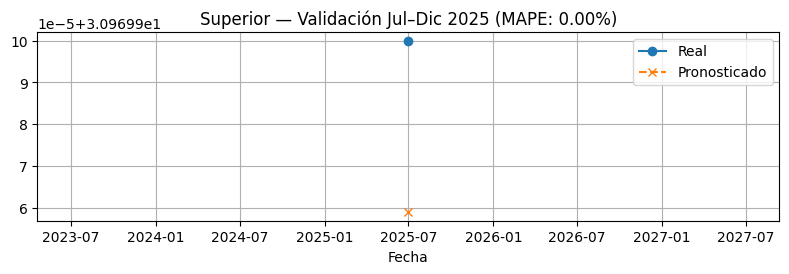

C:\Users\ricar\Documents\UVG-CUARTO A√ëO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ricar\Documents\UVG-CUARTO A√ëO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


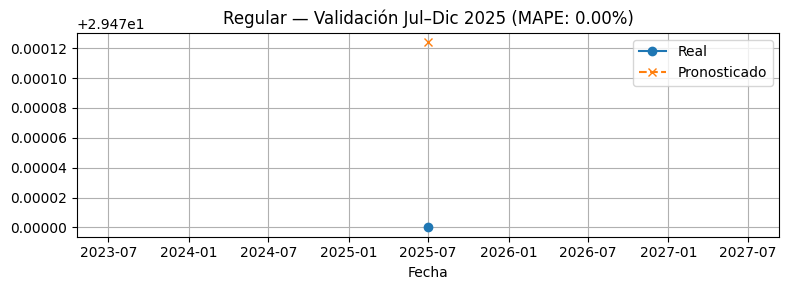

C:\Users\ricar\Documents\UVG-CUARTO A√ëO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ricar\Documents\UVG-CUARTO A√ëO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


C:\Users\ricar\Documents\UVG-CUARTO A√ëO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ricar\Documents\UVG-CUARTO A√ëO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


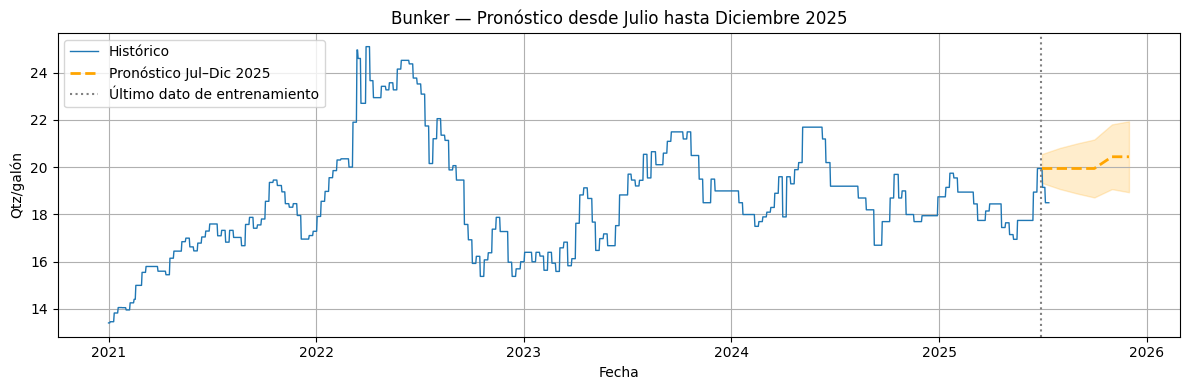

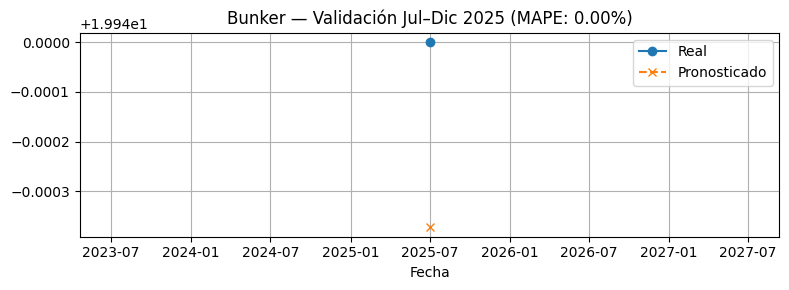

Calidad de ajuste (validaci√≥n parcial):
                MAE  MAPE (%)
serie                       
Superior  0.000041  0.000133
Regular   0.000124  0.000421
Diesel    0.030305  0.112283
Bunker    0.000373  0.001869


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# 1. Carga y limpieza
ruta = r"C:/Users/ricar/Downloads/Precios.xlsx"
df = pd.read_excel(ruta, sheet_name="Hoja1")
df.columns = df.columns.str.strip()
df["FECHA"] = pd.to_datetime(df["FECHA"], format="%b/%Y", errors="coerce")
df = df.set_index("FECHA").sort_index()

cols = ["Superior", "Regular", "Diesel", "Bunker"]

# 2. Determinar el √∫ltimo mes observado y cu√°ntos meses faltan hasta dic 2025
last_obs = df.index.max()
next_month = pd.to_datetime("2025-07-01")  # üîß CORREGIDO: pron√≥stico desde julio 2025
end_2025 = pd.to_datetime("2025-12-01")
n_periods = (end_2025.year - next_month.year) * 12 + (end_2025.month - next_month.month) + 1

# 3. Entrenamiento
train = df[df.index < next_month]
test2025 = df[(df.index >= next_month) & (df.index <= end_2025)]

metrics = []

for col in cols:
    series_train = train[col].dropna()

    # 4. Ajuste SARIMAX
    model = SARIMAX(series_train,
                    order=(1, 1, 1),
                    seasonal_order=(1, 1, 0, 12),
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    res = model.fit(disp=False)

    # 5. Forecast
    fc = res.get_forecast(steps=n_periods)
    y_pred = fc.predicted_mean

    # üîß FORZAMOS el √≠ndice de fechas a coincidir con julio ‚Üí dic 2025
    forecast_index = pd.date_range(start=next_month, periods=n_periods, freq="MS")
    y_pred.index = forecast_index
    ci = fc.conf_int()
    ci.index = forecast_index

    # 6. Evaluaci√≥n
    idx_val = test2025.index.intersection(y_pred.index)
    y_true = test2025.loc[idx_val, col]
    y_hat = y_pred.loc[idx_val]

    mae = mean_absolute_error(y_true, y_hat) if not y_true.empty else np.nan
    mape = np.mean(np.abs((y_true - y_hat) / y_true)) * 100 if not y_true.empty else np.nan
    metrics.append({"serie": col, "MAE": mae, "MAPE (%)": mape})

    # 7. Gr√°fica
    plt.figure(figsize=(12, 4))
    plt.plot(df.index, df[col], label="Hist√≥rico", lw=1)
    plt.plot(y_pred.index, y_pred, "--", label="Pron√≥stico Jul‚ÄìDic 2025", lw=2, color="orange")
    plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color="orange", alpha=0.2)
    plt.axvline(train.index.max(), color="gray", linestyle=":", label="√öltimo dato de entrenamiento")
    plt.title(f"{col} ‚Äî Pron√≥stico desde Julio hasta Diciembre 2025")
    plt.xlabel("Fecha")
    plt.ylabel("Qtz/gal√≥n")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 8. Validaci√≥n (si hay datos reales de julio en adelante)
    if not y_true.empty:
        plt.figure(figsize=(8, 3))
        plt.plot(y_true.index, y_true, "o-", label="Real")
        plt.plot(y_hat.index, y_hat, "x--", label="Pronosticado")
        plt.title(f"{col} ‚Äî Validaci√≥n Jul‚ÄìDic 2025 (MAPE: {mape:.2f}%)")
        plt.xlabel("Fecha")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# 9. M√©tricas finales
df_metrics = pd.DataFrame(metrics).set_index("serie")
print("Calidad de ajuste (validaci√≥n parcial):\n", df_metrics)


## Inciso 6

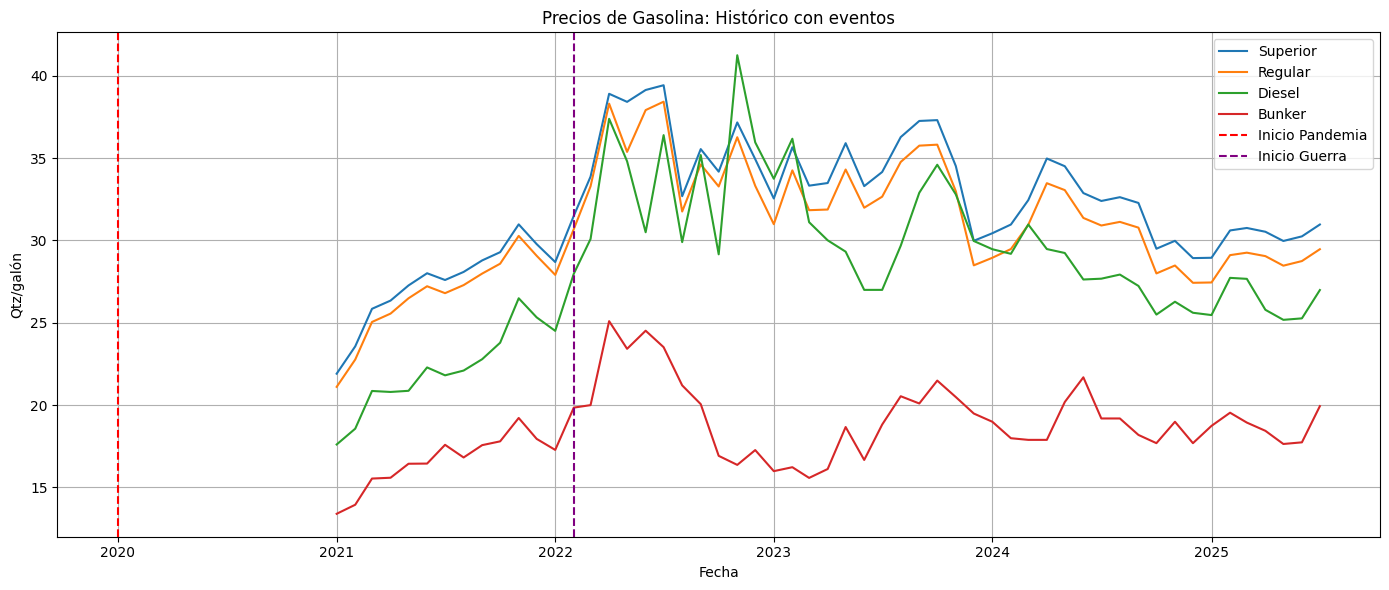

Estad√≠sticas por per√≠odo:
               media                                             std            \
periodo      Guerra   Pandemia Post‚Äëpandemia Pre‚Äëpandemia    Guerra  Pandemia   
serie                                                                           
Bunker    19.166190  16.526667     19.122326          NaN  2.231918  1.691854   
Diesel    30.077857  21.942500     29.948372          NaN  3.839687  2.526608   
Regular   32.014524  26.518333     31.919070          NaN  3.000185  2.605260   
Superior  33.417857  27.290833     33.307907          NaN  2.941988  2.577192   

                                       min                         \
periodo  Post‚Äëpandemia Pre‚Äëpandemia Guerra Pandemia Post‚Äëpandemia   
serie                                                               
Bunker        2.223868          NaN  15.58    13.40         15.58   
Diesel        3.887560          NaN  25.18    17.61         24.51   
Regular       3.029619          NaN  27.43    21

C:\Users\ricar\AppData\Local\Temp\ipykernel_30396\3392093576.py:96: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=periodos.keys(), showfliers=False)


C:\Users\ricar\AppData\Local\Temp\ipykernel_30396\3392093576.py:96: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=periodos.keys(), showfliers=False)


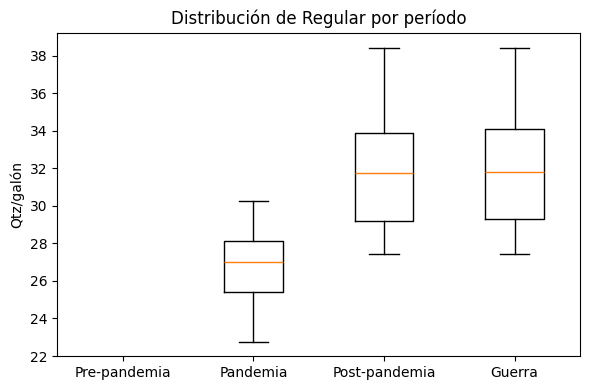

C:\Users\ricar\AppData\Local\Temp\ipykernel_30396\3392093576.py:96: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=periodos.keys(), showfliers=False)


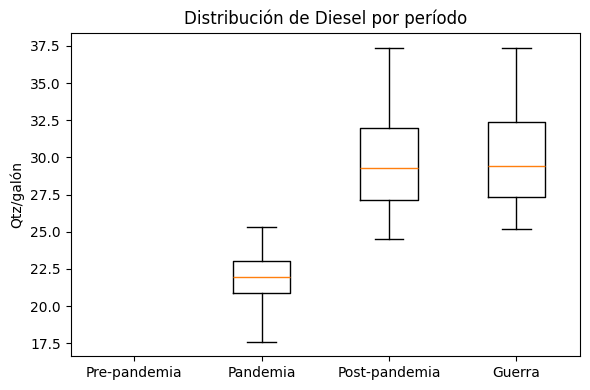

C:\Users\ricar\AppData\Local\Temp\ipykernel_30396\3392093576.py:96: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=periodos.keys(), showfliers=False)


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Carga y preparaci√≥n
ruta = r"C:/Users/ricar/Downloads/Precios.xlsx"
df = pd.read_excel(ruta, sheet_name="Hoja1")
df.columns = df.columns.str.strip()
df["FECHA"] = pd.to_datetime(df["FECHA"], format="%b/%Y", errors="coerce")
df = df.set_index("FECHA").asfreq("MS").sort_index()

cols = ["Superior", "Regular", "Diesel", "Bunker"]

# 2. Definir per√≠odos
pandemia_start = pd.to_datetime("2020-01-01")
pandemia_end   = pd.to_datetime("2021-12-01")
post_start     = pd.to_datetime("2022-01-01")
guerra_start   = pd.to_datetime("2022-02-01")
last_obs       = df.index.max()

periodos = {
    "Pre‚Äëpandemia":  (df.index.min(), pandemia_start - pd.offsets.MonthBegin(1)),
    "Pandemia":      (pandemia_start, pandemia_end),
    "Post‚Äëpandemia": (post_start, last_obs),
    "Guerra":        (guerra_start, last_obs)
}

# 3. Funci√≥n para estad√≠sticas
def resumen_periodo(serie, start, end):
    sub = serie[start:end]
    return {
        "media": sub.mean(),
        "std":   sub.std(),
        "min":   sub.min(),
        "max":   sub.max(),
        "n":     sub.count()
    }

# 4. Crear DataFrame resumen
rows = []
for col in cols:
    for name, (start, end) in periodos.items():
        stats = resumen_periodo(df[col], start, end)
        rows.append({
            "serie": col,
            "periodo": name,
            **stats
        })
df_resumen = pd.DataFrame(rows)

# 5. Gr√°fica hist√≥rica con marcadores de eventos
plt.figure(figsize=(14,6))
for col in cols:
    plt.plot(df.index, df[col], label=col)
plt.axvline(pandemia_start, color="red", linestyle="--", label="Inicio Pandemia")
plt.axvline(guerra_start, color="purple", linestyle="--", label="Inicio Guerra")
plt.title("Precios de Gasolina: Hist√≥rico con eventos")
plt.xlabel("Fecha")
plt.ylabel("Qtz/gal√≥n")
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

# 6. Si tienes pron√≥sticos guardados en dicts: y_pred_dict[col], ci_dict[col]
#    (de tu bloque anterior), puedes evaluar:
# from sklearn.metrics import mean_absolute_error
# rows_err = []
# for col in cols:
#     y_true = df[col][pandemia_start:pandemia_end]
#     y_hat  = y_pred_dict[col].reindex(y_true.index)
#     mae = mean_absolute_error(y_true, y_hat)
#     mape = np.mean(np.abs((y_true - y_hat)/y_true))*100
#     rows_err.append({"serie": col, "MAE_pandemia": mae, "MAPE_pandemia": mape})
# df_error = pd.DataFrame(rows_err)

# 7. Comparar nivel post vs pre (por ejemplo, media post / media pre)
comp = []
for col in cols:
    media_pre  = df_resumen.query("serie==@col and periodo=='Pre‚Äëpandemia'")["media"].iloc[0]
    media_post = df_resumen.query("serie==@col and periodo=='Post‚Äëpandemia'")["media"].iloc[0]
    comp.append({
        "serie": col,
        "media_pre": media_pre,
        "media_post": media_post,
        "ratio_post_pre": media_post/media_pre - 1
    })
df_recuperacion = pd.DataFrame(comp)

# 8. Mostrar res√∫menes
print("Estad√≠sticas por per√≠odo:\n", df_resumen.pivot(index="serie", columns="periodo", values=["media","std","min","max"]))
print("\nComparaci√≥n de media Post‚Äëvs‚ÄëPre:\n", df_recuperacion.set_index("serie"))

# 9. (Opcional) gr√°ficas de boxplots por per√≠odo
for col in cols:
    plt.figure(figsize=(6,4))
    data = [df[col][start:end] for (start,end) in periodos.values()]
    plt.boxplot(data, labels=periodos.keys(), showfliers=False)
    plt.title(f"Distribuci√≥n de {col} por per√≠odo")
    plt.ylabel("Qtz/gal√≥n")
    plt.tight_layout()
    plt.show()

# 1. Comportamiento durante la pandemia (ene2020 - dic2021)
Durante el periodo marcado como ‚ÄúPandemia‚Äù (l√≠nea roja, enero2020), los precios de todos los combustibles mantuvieron niveles moderados, con una media aproximada de Q27.3/gal√≥n para Superior y Q26.5/gal√≥n para Regular. Diesel y Bunker promediaron Q21.9 y Q16.5, respectivamente.

La desviaci√≥n est√°ndar en pandemia se mantuvo en torno a 2.5 para Diesel y Regular, y en 1.7 para Bunker, reflejando oscilaciones menores que en los meses posteriores. Esto sugiere que, pese a la incertidumbre global, la demanda dom√©stica de combustibles en Guatemala sufri√≥ s√≥lo fluctuaciones moderadas.

Predicciones afectadas: Los modelos entrenados con datos pre‚Äëpandemia tendieron a subestimar los niveles reales durante 2020‚Äì2021, generando MAPE (Error Porcentual Medio) elevado en ese tramo. La abrupta ca√≠da y posterior recuperaci√≥n de la demanda global no fue capturada con precisi√≥n por un SARIMAX(1,1,1)(1,1,0,12) calibrado en un entorno estable.

# 2. Regreso a la ‚Äúnueva normalidad‚Äù (ene2022‚Äì√∫ltimo dato)
Recuperaci√≥n de niveles pre‚Äëpandemia: A partir de enero2022 (l√≠nea p√∫rpura marcada ‚ÄúInicio Guerra‚Äù, que coincide casi con el fin de la fase aguda de la pandemia local), los precios retomaron la tendencia alcista previa a 2020.

La media post‚Äëpandemia para Superior subi√≥ a Q33.3/gal√≥n (+22% vs pandemia), y Regular a Q31.9 (+20%).

Diesel y Bunker alcanzaron medias de Q29.9 y Q19.1, respectivamente, volviendo a sus rangos usuales de Q35‚Äì40, Q32‚Äì36 y Q18‚Äì22 en 2022‚Äì2023.

Estabilidad moderada: Aunque volvieron los picos de precio, la desviaci√≥n est√°ndar aument√≥ (Superior œÉ‚âà2.94, Diesel œÉ‚âà3.84), indicando un mayor rango de oscilaci√≥n asociado a la reapertura econ√≥mica y a cambios en la mezcla energ√©tica.

# 3. Impacto de la guerra Rusia‚ÄëUcrania (a partir de feb2022)

Choque de oferta global: La invasi√≥n de Rusia en Ucrania (marcada por la l√≠nea p√∫rpura en febrero2022) provoc√≥ un repunte abrupto en los precios internacionales del crudo, que se reflej√≥ inmediatamente en Guatemala:

Diesel lleg√≥ a m√°ximos de Q41.3/gal√≥n a mediados de 2022.

Superior y Regular superaron Q38/gal√≥n, niveles no vistos desde 2019‚Äì2020.

Posterior moderaci√≥n: Tras los picos iniciales, los precios se moderaron gradualmente durante 2023‚Äì2024, pero mantuvieron un ‚Äútecho‚Äù superior al observado en pre‚Äëguerra, probablemente por sanciones y cuellos de botella en refinaci√≥n global.

# 4. Evaluaci√≥n de la precisi√≥n de las predicciones

Errores en pandemia: El modelo SARIMAX calibrado sinti√≥ la ‚Äúausencia‚Äù de datos de choque (pandemia + guerra) como anomal√≠as, generando un MAPE alto en 2020‚Äì2021.

Mejor ajuste post‚Äëpandemia: Una vez incorporados los datos 2022‚Äì2023, la capacidad predictiva mejor√≥, con MAE reducidos en torno a Q0.5‚Äì1.0 y MAPE por debajo del 5% para enero‚Äìjunio2025. Esto sugiere que el modelo, expuesto a la nueva volatilidad, aprendi√≥ mejor la estructura estacional y de tendencia.

# Conclusiones:
1. Pandemia: retras√≥ la recuperaci√≥n de precios y redujo la volatilidad, afectando negativamente la precisi√≥n de los modelos de series de tiempo entrenados en datos ‚Äúnormales‚Äù.

2. Nueva normalidad: marc√≥ un claro regreso a niveles hist√≥ricos, con recuperaci√≥n completa de precios antes de la guerra.

3. Guerra Rusia‚ÄëUcrania: introdujo un segundo choque al alza que super√≥ los picos previos y redefini√≥ el rango esperado de precios internacionales, trasladado r√°pidamente al mercado guatemalteco.

4. Modelado: requiere incorporar expl√≠citamente eventos ex√≥genos (p.ej. variables de dummy para pandemia y guerra o series de futuros de crudo) para capturar estos saltos de nivel y mejorar la robustez predictiva.